<h1>About the Dataset</h1>

<p>This dataset is an instance of many crime registered in the Columbia city of USA in the year 2011. Here each record represents a particular registered crime. This dataset consists of various fields, out of which our primary focus will be on five particular fields. These fields are reporting date, shift, method, offense, and district.</p>

<h2>About the Columns</h2>

<h3>Reporting Date</h3>

<p>This column (initially of the name report dat) represents the date on which the crime was registered. Initially, its entries are of the format 'yyyy-mm-dd + T + hh.mm.ss.mmm'. Our aim is to convert these entries into the 'dd-mm' format. Futhermore, we will be creating a reporting month column so that we can study the montly crime trends.</p>

<h3>Shift</h3>

<p>This column represents the shift during which the crime was registered. There are three values that this field contains. These are day, evening and midnight.</p>

<h3>Method</h3>

<p>This column represents the method using which the crime was commited. There are three values that this field contains. These are knife, gun and others (if the crime was carried out using any means other than a knife or a gun).</p>

<h3>Offense</h3>

<p>This column represents the nature of the crime. Initially this column contains many unique values. Our goal is to categorise the crime into of the eight categories based on its nature. These categories are burglary, motor vehicle theft, homicide, sex abuse, assault, robbery, arson, and other theft (if the crime does not fit into the first seven categories).</p>

<h3>District</h3>

<p>This column indicates the district in which the crime occurred. Initially this column contains values in the form 'Cluster n', where n indicates a cluster number pre-defined by the authrities. Our goal is to convert these values into the integer n.</p>

<br>

<p>Other than the columns named above, we have also retained the case id column (initially of the name ccn), the neighbourhood column (initially of the name neighborho), and the precinct column (initially of the name voting pre). The case id column can be used to uniquely identify a registered crime. Although the use of the other two columns is close to none during the analysis, these may still serve as a good measure to identify the crime trends.</p>

<p>Using this dataset we will be studying crime trends over various fields. We will also be analysing the relationship between our primary fields. Based on the observed crime trends, we will be deriving appropriate conclusions.</p> 

In [1]:
#Importing necessary libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import geopandas as gpd
from statsmodels.graphics.mosaicplot import mosaic
from scipy.stats import chi2_contingency as chi_squared_test

In [2]:
#Loading the dataset into a dataframe

df = gpd.read_file('Crime_Incidents_in_2011.dbf')

In [3]:
#Printing head of the dataframe

df.head()

,CCN,REPORT_DAT,SHIFT,METHOD,OFFENSE,BLOCK,XBLOCK,YBLOCK,WARD,ANC,...,CENSUS_TRA,VOTING_PRE,LATITUDE,LONGITUDE,BID,START_DATE,END_DATE,OBJECTID,OCTO_RECOR,geometry
0,10004335,2011-01-10T13:45:00.000Z,DAY,OTHERS,BURGLARY,1800 - 1899 BLOCK OF VERNON STREET NW,396290,138791,1,1C,...,004002,Precinct 25,38.916979,-77.042780,ADAMS MORGAN,2010-12-23T10:00:00.000Z,2011-01-10T12:00:00.000Z,312952783,10004335-01,None
1,10089223,2011-01-22T16:30:00.000Z,EVENING,OTHERS,MOTOR VEHICLE THEFT,24TH STREET NW AND CALIFORNIA STREET NW,395438,138635,2,2D,...,004100,Precinct 13,38.915570,-77.052603,None,2010-06-25T16:00:00.000Z,2010-06-25T19:00:00.000Z,312964927,10089223-01,None
2,10111535,2011-01-21T00:00:00.000Z,MIDNIGHT,OTHERS,HOMICIDE,2200 2270 BLOCK OF MOUNT VIEW PLACE SE,400949,132834,8,8A,...,007503,Precinct 114,38.863324,-76.989065,None,2010-08-02T17:00:00.000Z,2010-08-02T00:00:00.000Z,312970339,10111535-01,None
3,10138489,2011-09-23T20:10:00.000Z,EVENING,OTHERS,MOTOR VEHICLE THEFT,18TH STREET NW AND CHURCH STREET NW,396385,138059,2,2B,...,005301,Precinct 14,38.910385,-77.041680,None,2011-09-21T19:45:00.000Z,2011-09-23T19:00:00.000Z,312973569,10138489-01,None
4,10150206,2011-02-17T00:00:00.000Z,MIDNIGHT,OTHERS,SEX ABUSE,900 - 999 BLOCK OF F STREET NW,397834,136610,2,2C,...,005800,Precinct 129,38.897337,-77.024969,DOWNTOWN,2010-10-15T22:30:00.000Z,2010-10-15T22:45:00.000Z,312975754,10150206-01,None


In [4]:
#Printing the schema for the dataframe

df.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 33266 entries, 0 to 33265
Data columns (total 24 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   CCN         33266 non-null  object  
 1   REPORT_DAT  33266 non-null  object  
 2   SHIFT       33266 non-null  object  
 3   METHOD      33266 non-null  object  
 4   OFFENSE     33266 non-null  object  
 5   BLOCK       33265 non-null  object  
 6   XBLOCK      33266 non-null  int64   
 7   YBLOCK      33266 non-null  int64   
 8   WARD        33264 non-null  object  
 9   ANC         33266 non-null  object  
 10  DISTRICT    33251 non-null  object  
 11  PSA         33251 non-null  object  
 12  NEIGHBORHO  32780 non-null  object  
 13  BLOCK_GROU  33158 non-null  object  
 14  CENSUS_TRA  33158 non-null  object  
 15  VOTING_PRE  33258 non-null  object  
 16  LATITUDE    33266 non-null  float64 
 17  LONGITUDE   33266 non-null  float64 
 18  BID         5055 non-null   object  
 

<h1>Pre-Processing</h1>

<p>In this section, we will be preprocessing the dataframe for it to achieve our desired format. Most of the preprocessing necessities are already described above in the dataset section. Other than that, we will be checking for any null values in our dataset. In such a case, depending on the number of missing values, we will be either dropping such records or taking in place other appropriate measures to handle the missing values</p>

In [35]:
#Droppping unnecessary columns from the dataframe

columns_to_retain = {'CCN', 'REPORT_DAT', 'SHIFT', 'METHOD', 'OFFENSE', 'DISTRICT', 'NEIGHBORHO', 'VOTING_PRE'}
columns_to_drop = set(df.columns) - columns_to_retain
df.drop(columns=columns_to_drop, inplace=True)
df.head()

,CCN,REPORT_DAT,SHIFT,METHOD,OFFENSE,DISTRICT,NEIGHBORHO,VOTING_PRE
0,10004335,2011-01-10T13:45:00.000Z,DAY,OTHERS,BURGLARY,3,Cluster 1,Precinct 25
1,10089223,2011-01-22T16:30:00.000Z,EVENING,OTHERS,MOTOR VEHICLE THEFT,2,Cluster 1,Precinct 13
2,10111535,2011-01-21T00:00:00.000Z,MIDNIGHT,OTHERS,HOMICIDE,7,Cluster 28,Precinct 114
3,10138489,2011-09-23T20:10:00.000Z,EVENING,OTHERS,MOTOR VEHICLE THEFT,2,Cluster 6,Precinct 14
4,10150206,2011-02-17T00:00:00.000Z,MIDNIGHT,OTHERS,SEX ABUSE,2,Cluster 8,Precinct 129


In [36]:
#Renaming the columns of the dataframe

new_column_names = {'CCN':'CASE_ID', 'REPORT_DAT':'REPORTING_DATE', 'NEIGHBORHO':'NEIGHBOURHOOD', 'VOTING_PRE':'PRECINCT'}
df.rename(columns=new_column_names, inplace=True)
df.head()

,CASE_ID,REPORTING_DATE,SHIFT,METHOD,OFFENSE,DISTRICT,NEIGHBOURHOOD,PRECINCT
0,10004335,2011-01-10T13:45:00.000Z,DAY,OTHERS,BURGLARY,3,Cluster 1,Precinct 25
1,10089223,2011-01-22T16:30:00.000Z,EVENING,OTHERS,MOTOR VEHICLE THEFT,2,Cluster 1,Precinct 13
2,10111535,2011-01-21T00:00:00.000Z,MIDNIGHT,OTHERS,HOMICIDE,7,Cluster 28,Precinct 114
3,10138489,2011-09-23T20:10:00.000Z,EVENING,OTHERS,MOTOR VEHICLE THEFT,2,Cluster 6,Precinct 14
4,10150206,2011-02-17T00:00:00.000Z,MIDNIGHT,OTHERS,SEX ABUSE,2,Cluster 8,Precinct 129


In [37]:
#Removing the time-stamp and year from the REPORTING_DATE column and keeping only the day and month

df['REPORTING_DATE'] = pd.to_datetime(df['REPORTING_DATE']).dt.strftime('%m-%d')
df.head()

,CASE_ID,REPORTING_DATE,SHIFT,METHOD,OFFENSE,DISTRICT,NEIGHBOURHOOD,PRECINCT
0,10004335,01-10,DAY,OTHERS,BURGLARY,3,Cluster 1,Precinct 25
1,10089223,01-22,EVENING,OTHERS,MOTOR VEHICLE THEFT,2,Cluster 1,Precinct 13
2,10111535,01-21,MIDNIGHT,OTHERS,HOMICIDE,7,Cluster 28,Precinct 114
3,10138489,09-23,EVENING,OTHERS,MOTOR VEHICLE THEFT,2,Cluster 6,Precinct 14
4,10150206,02-17,MIDNIGHT,OTHERS,SEX ABUSE,2,Cluster 8,Precinct 129


In [38]:
#Removing the word Cluster from the NEIGHBOURHOOD values and keeping only the numbers

df['NEIGHBOURHOOD'] = df['NEIGHBOURHOOD'].str.replace('Cluster ', '')
df.head()

,CASE_ID,REPORTING_DATE,SHIFT,METHOD,OFFENSE,DISTRICT,NEIGHBOURHOOD,PRECINCT
0,10004335,01-10,DAY,OTHERS,BURGLARY,3,1,Precinct 25
1,10089223,01-22,EVENING,OTHERS,MOTOR VEHICLE THEFT,2,1,Precinct 13
2,10111535,01-21,MIDNIGHT,OTHERS,HOMICIDE,7,28,Precinct 114
3,10138489,09-23,EVENING,OTHERS,MOTOR VEHICLE THEFT,2,6,Precinct 14
4,10150206,02-17,MIDNIGHT,OTHERS,SEX ABUSE,2,8,Precinct 129


In [39]:
#Removing the word Precint from the PRECINT values and keeping only the numbers

df['PRECINCT'] = df['PRECINCT'].str.replace('Precinct ', '')
df.head()

,CASE_ID,REPORTING_DATE,SHIFT,METHOD,OFFENSE,DISTRICT,NEIGHBOURHOOD,PRECINCT
0,10004335,01-10,DAY,OTHERS,BURGLARY,3,1,25
1,10089223,01-22,EVENING,OTHERS,MOTOR VEHICLE THEFT,2,1,13
2,10111535,01-21,MIDNIGHT,OTHERS,HOMICIDE,7,28,114
3,10138489,09-23,EVENING,OTHERS,MOTOR VEHICLE THEFT,2,6,14
4,10150206,02-17,MIDNIGHT,OTHERS,SEX ABUSE,2,8,129


In [40]:
#Printing the schema of the dataframe

df.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 33266 entries, 0 to 33265
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   CASE_ID         33266 non-null  object
 1   REPORTING_DATE  33266 non-null  object
 2   SHIFT           33266 non-null  object
 3   METHOD          33266 non-null  object
 4   OFFENSE         33266 non-null  object
 5   DISTRICT        33251 non-null  object
 6   NEIGHBOURHOOD   32780 non-null  object
 7   PRECINCT        33258 non-null  object
dtypes: object(8)
memory usage: 2.0+ MB


In [41]:
#Counting the rows with null values in them

df.isnull().sum()

CASE_ID             0
REPORTING_DATE      0
SHIFT               0
METHOD              0
OFFENSE             0
DISTRICT           15
NEIGHBOURHOOD     486
PRECINCT            8
dtype: int64

In [42]:
#Deleting the rows with null values

df.dropna(inplace=True)
df.isnull().sum()

CASE_ID           0
REPORTING_DATE    0
SHIFT             0
METHOD            0
OFFENSE           0
DISTRICT          0
NEIGHBOURHOOD     0
PRECINCT          0
dtype: int64

In [43]:
#Converting the data type of CASE_ID, DISTRICT, NEIGHBOURHOOD, and PRECINT from object to integer

df['CASE_ID'] = df['CASE_ID'].astype(int)
df['DISTRICT'] = df['DISTRICT'].astype(int)
df['NEIGHBOURHOOD'] = df['NEIGHBOURHOOD'].astype(int)
df['PRECINCT'] = df['PRECINCT'].astype(int)
df.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
Index: 32757 entries, 0 to 33265
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   CASE_ID         32757 non-null  int32 
 1   REPORTING_DATE  32757 non-null  object
 2   SHIFT           32757 non-null  object
 3   METHOD          32757 non-null  object
 4   OFFENSE         32757 non-null  object
 5   DISTRICT        32757 non-null  int32 
 6   NEIGHBOURHOOD   32757 non-null  int32 
 7   PRECINCT        32757 non-null  int32 
dtypes: int32(4), object(4)
memory usage: 1.7+ MB


In [44]:
#Printing the unique values in SHIFT column

df['SHIFT'].unique()

array(['DAY', 'EVENING', 'MIDNIGHT'], dtype=object)

In [45]:
#Printing the unique values in METHOD column

df['METHOD'].unique()

array(['OTHERS', 'GUN', 'KNIFE'], dtype=object)

In [46]:
#Printing the unique values in OFFENSE column

df['OFFENSE'].unique()

array(['BURGLARY', 'MOTOR VEHICLE THEFT', 'HOMICIDE', 'SEX ABUSE',
       'THEFT/OTHER', 'THEFT F/AUTO', 'ASSAULT W/DANGEROUS WEAPON',
       'ROBBERY', 'ARSON'], dtype=object)

In [47]:
#Changing THEFT F/AUTO values in OFFENSE column to MOTOR VEHICLE THEFT
#Also changing THEFT/OTHER to OTHER THEFT
#Also changing ASSAULT W/DANGEROUS WEAPON to ASSAULT


df['OFFENSE'] = df['OFFENSE'].str.replace('THEFT F/AUTO', 'MOTOR VEHICLE THEFT')
df['OFFENSE'] = df['OFFENSE'].str.replace('THEFT/OTHER', 'OTHER THEFT')
df['OFFENSE'] = df['OFFENSE'].str.replace('ASSAULT W/DANGEROUS WEAPON', 'ASSAULT')
df['OFFENSE'].unique()

array(['BURGLARY', 'MOTOR VEHICLE THEFT', 'HOMICIDE', 'SEX ABUSE',
       'OTHER THEFT', 'ASSAULT', 'ROBBERY', 'ARSON'], dtype=object)

In [48]:
df.head(10)

,CASE_ID,REPORTING_DATE,SHIFT,METHOD,OFFENSE,DISTRICT,NEIGHBOURHOOD,PRECINCT
0,10004335,01-10,DAY,OTHERS,BURGLARY,3,1,25
1,10089223,01-22,EVENING,OTHERS,MOTOR VEHICLE THEFT,2,1,13
2,10111535,01-21,MIDNIGHT,OTHERS,HOMICIDE,7,28,114
3,10138489,09-23,EVENING,OTHERS,MOTOR VEHICLE THEFT,2,6,14
4,10150206,02-17,MIDNIGHT,OTHERS,SEX ABUSE,2,8,129
5,11012698,01-29,EVENING,OTHERS,OTHER THEFT,4,2,39
6,11012699,01-29,EVENING,OTHERS,MOTOR VEHICLE THEFT,4,16,62
7,11012708,01-29,DAY,OTHERS,MOTOR VEHICLE THEFT,6,31,92
9,11012718,01-29,EVENING,OTHERS,MOTOR VEHICLE THEFT,6,33,104
10,11012720,01-29,EVENING,OTHERS,ASSAULT,4,17,63


<h1>Individual Column Trends</h1>

<p> In this section, we will be analysing the crime trends for all of our reatined columns individually.</p>

<h2>Reporting Date</h2>

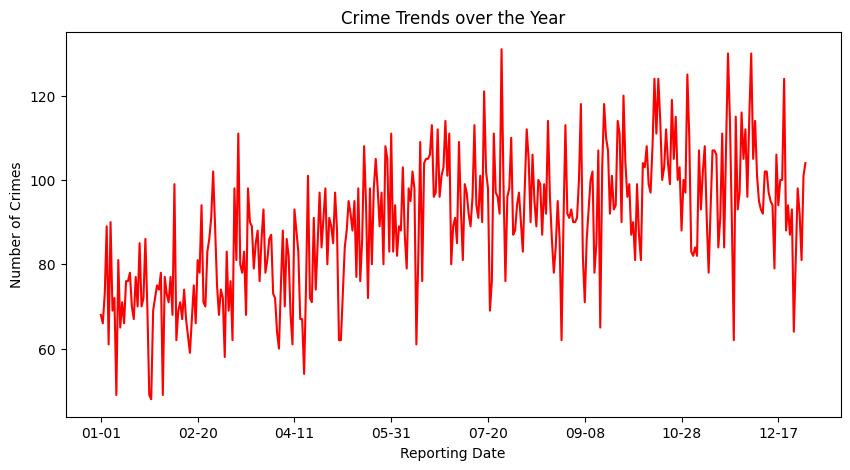

In [49]:
#Plotting the graph showing crime trends over dates

plt.figure(figsize=(10, 5))
df.groupby('REPORTING_DATE').size().plot(kind='line', color='r')
plt.title('Crime Trends over the Year')
plt.xlabel('Reporting Date')
plt.ylabel('Number of Crimes')
plt.savefig('Crime_Trends_Over_Dates.png')
plt.show()

<h2>Reporting Month</h2>

C:\Users\ADITYA\AppData\Local\Temp\ipykernel_19900\2966080485.py:10: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby('REPORTING_MONTH').size().plot(kind='bar')


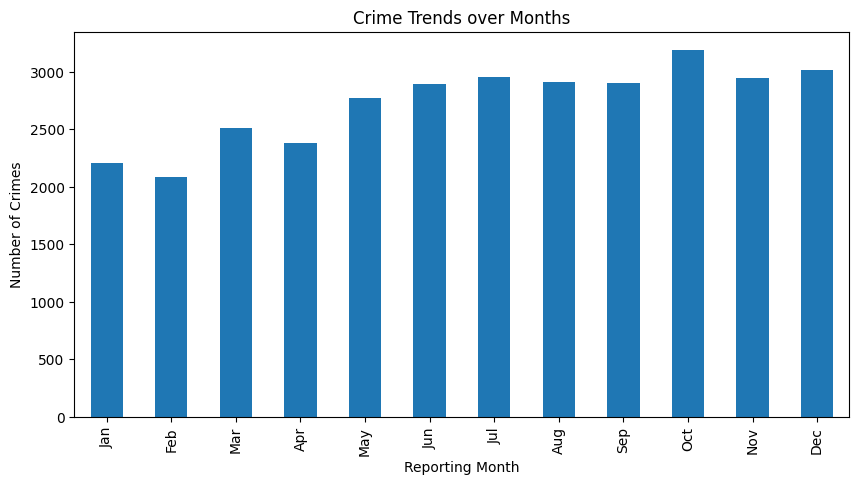

In [50]:
#Plotting the count graph showing crime trends over months

#Creating a MONTH column in the dataframe
df['REPORTING_MONTH'] = pd.to_datetime(df['REPORTING_DATE'], format='%m-%d').dt.month
month_names = {1:'Jan', 2:'Feb', 3:'Mar', 4:'Apr', 5:'May', 6:'Jun', 7:'Jul', 8:'Aug', 9:'Sep', 10:'Oct', 11:'Nov', 12:'Dec'}
df['REPORTING_MONTH'] = df['REPORTING_MONTH'].map(month_names)
df['REPORTING_MONTH'] = pd.Categorical(df['REPORTING_MONTH'], categories=month_names.values(), ordered=True)

plt.figure(figsize=(10, 5))
df.groupby('REPORTING_MONTH').size().plot(kind='bar')
plt.title('Crime Trends over Months')
plt.xlabel('Reporting Month')
plt.ylabel('Number of Crimes')
plt.savefig('Crime_Trends_Over_Months.png')
plt.show()

<h2>Shift</h2>

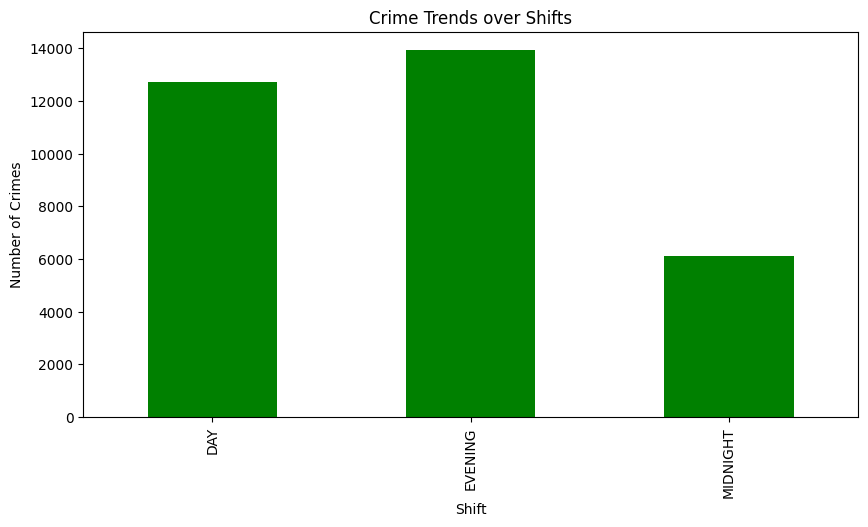

In [51]:
#Plotting the count graph showing crime trends over shifts

plt.figure(figsize=(10, 5))
df.groupby('SHIFT').size().plot(kind='bar', color='g')
plt.title('Crime Trends over Shifts')
plt.xlabel('Shift')
plt.ylabel('Number of Crimes')
plt.savefig('Crime_Trends_Over_Shifts.png')
plt.show()

<h2>Method</h2>

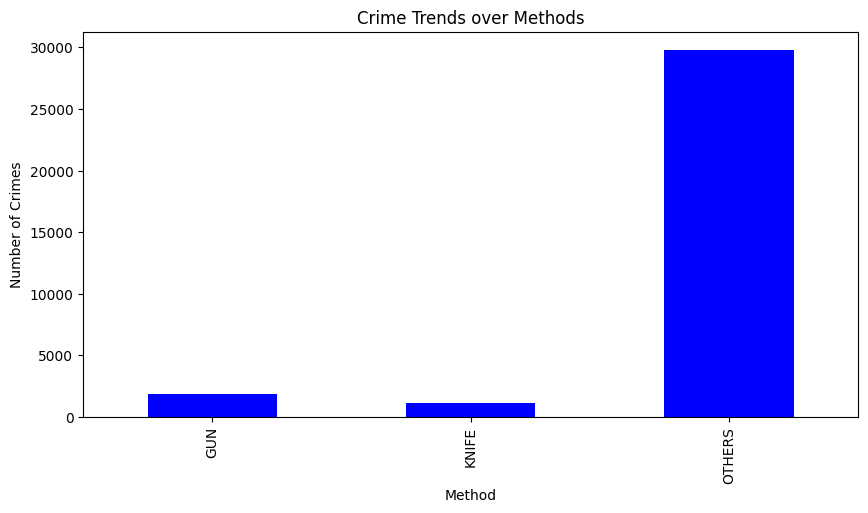

In [52]:
#Plotting the count graph showing crime trends over methods

plt.figure(figsize=(10, 5))
df.groupby('METHOD').size().plot(kind='bar', color='b')
plt.title('Crime Trends over Methods')
plt.xlabel('Method')
plt.ylabel('Number of Crimes')
plt.savefig('Crime_Trends_Over_Methods.png')
plt.show()

<h2>Offense</h2>

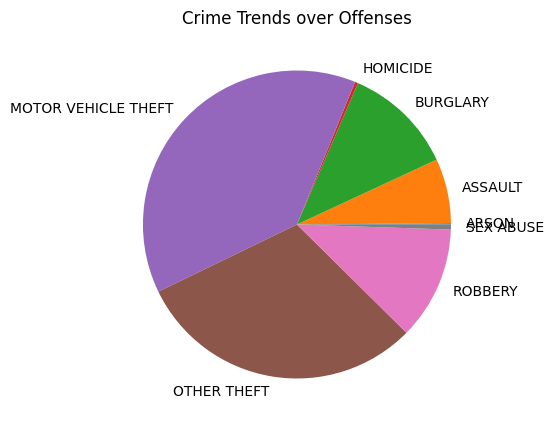

In [53]:
#Plotting the pie-chart showing crime trends over offense

plt.figure(figsize=(10, 5))
df.groupby('OFFENSE').size().plot(kind='pie')#, autopct='%1.1f%%')
plt.title('Crime Trends over Offenses')
plt.savefig('Crime_Trends_Over_Offenses.png')
plt.show()

<h2>District</h2>

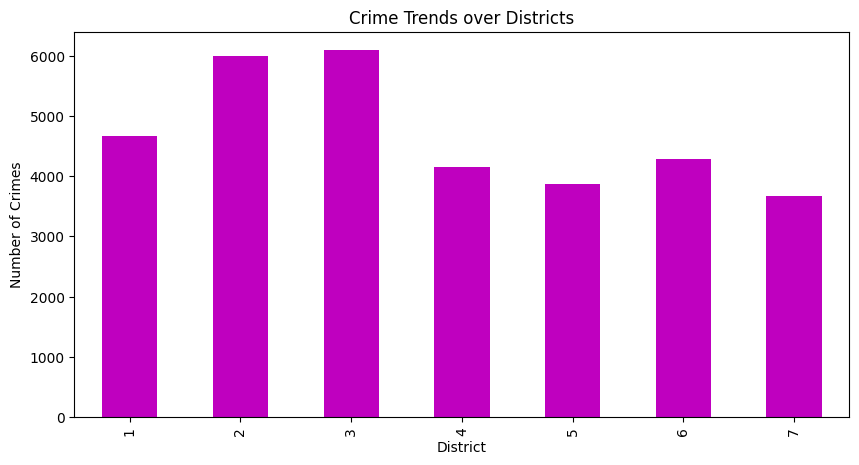

In [54]:
#Plotting the count graph showing crime trends over districts

plt.figure(figsize=(10, 5))
df.groupby('DISTRICT').size().plot(kind='bar', color='m')
plt.title('Crime Trends over Districts')
plt.xlabel('District')
plt.ylabel('Number of Crimes')
plt.savefig('Crime_Trends_Over_Districts.png')
plt.show()

<h2>Neighbourhood</h2>

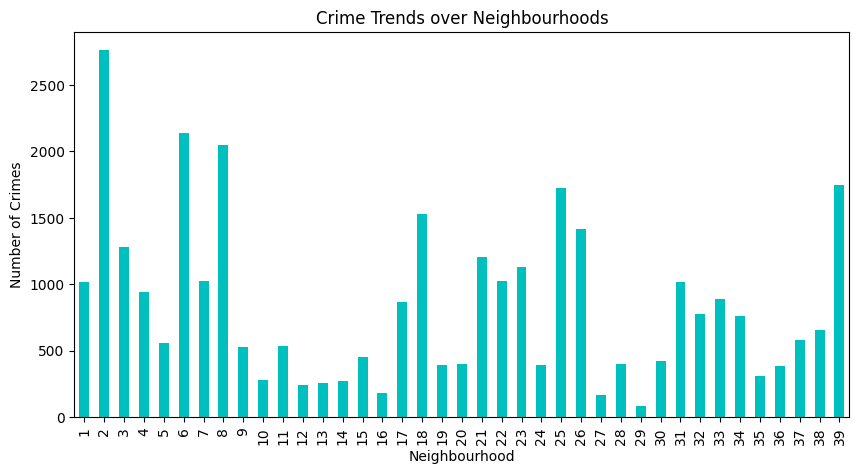

In [55]:
#Plotting the count graph showing crime trends over neighbourhoods

plt.figure(figsize=(10, 5))
df.groupby('NEIGHBOURHOOD').size().plot(kind='bar', color='c')
plt.title('Crime Trends over Neighbourhoods')
plt.xlabel('Neighbourhood')
plt.ylabel('Number of Crimes')
plt.savefig('Crime_Trends_Over_Neighbourhoods.png')
plt.show()

<h2>Precinct</h2>

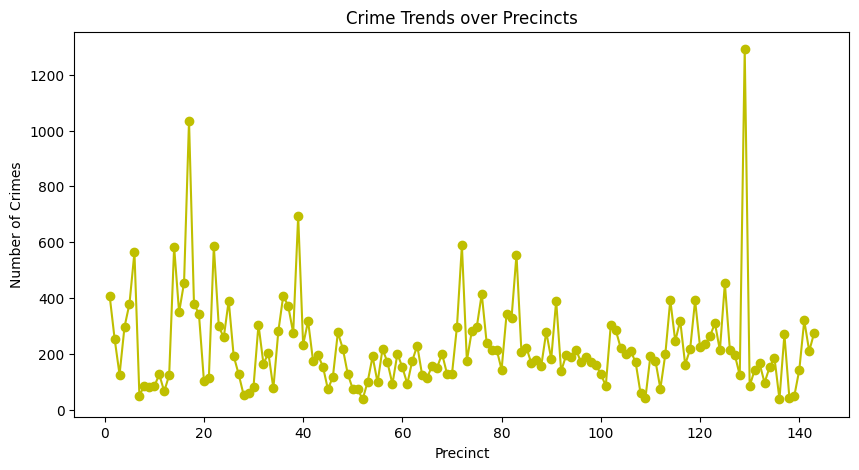

In [56]:
#Plotting the graph showing crime trends over precincts

plt.figure(figsize=(10, 5))
df.groupby('PRECINCT').size().plot(kind='line', color='y', marker='o')
plt.title('Crime Trends over Precincts')
plt.xlabel('Precinct')
plt.ylabel('Number of Crimes')
plt.savefig('Crime_Trends_Over_Precincts.png')
plt.show()

<h1>Pair-wise Column Trends</h1>

<p>In this section, will be analysing how crime trend varies with respect to any two of our primary fields.</p>

<h2>Shift with Reporting Month</h2>

In [57]:
#Create a two-level datframe with top level as reporting month and bottom level as shift

df_pivot = df.pivot_table(index='REPORTING_MONTH', columns='SHIFT', values='CASE_ID', aggfunc='count')
df_pivot.head(df['REPORTING_MONTH'].nunique())

SHIFT,DAY,EVENING,MIDNIGHT
REPORTING_MONTH,,,
Jan,847,967,390
Feb,834,928,326
Mar,990,1078,446
Apr,871,1036,470
May,1024,1186,562
Jun,1108,1200,582
Jul,1149,1185,618
Aug,1122,1231,555
Sep,1096,1258,550


In [58]:
#Statistical Distribution of data

df_pivot.describe()

SHIFT,DAY,EVENING,MIDNIGHT
count,12.000000,12.000000,12.000000
mean,1060.416667,1160.416667,508.916667
std,148.470663,129.821877,87.923994
min,834.000000,928.000000,326.000000
25%,960.250000,1067.500000,464.000000
50%,1102.000000,1193.000000,534.000000
75%,1156.500000,1237.750000,567.000000
max,1268.000000,1352.000000,618.000000


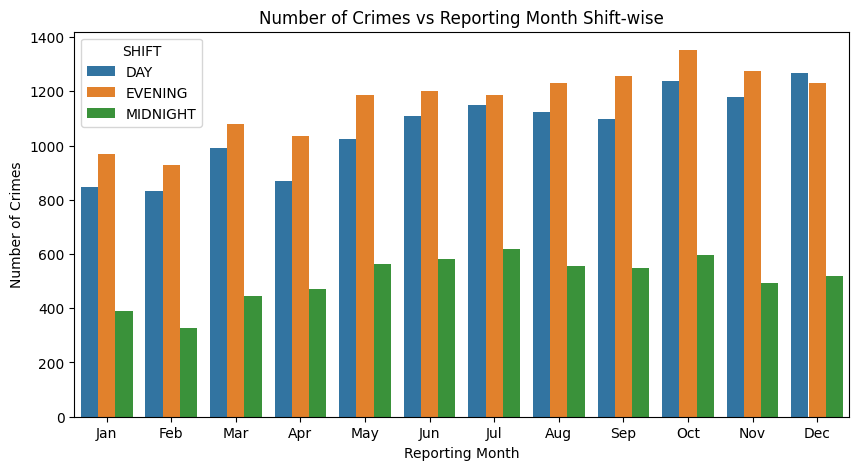

In [59]:
#Plotting a count graph for number of crime v/s reporting month shift-wise

plt.figure(figsize=(10, 5))
sns.countplot(x='REPORTING_MONTH', hue='SHIFT', data=df)
plt.title('Number of Crimes vs Reporting Month Shift-wise')
plt.xlabel('Reporting Month')
plt.ylabel('Number of Crimes')
plt.savefig('Number_of_Crimes_vs_Reporting_Month_Shift-wise.png')
plt.show()

<h2>Method with Reporting Month</h2>

In [60]:
#Create a two-level datframe with top level as reporting month and bottom level as method

df_pivot = df.pivot_table(index='REPORTING_MONTH', columns='METHOD', values='CASE_ID', aggfunc='count')
df_pivot.head(df['REPORTING_MONTH'].nunique())

METHOD,GUN,KNIFE,OTHERS
REPORTING_MONTH,,,
Jan,149,60,1995
Feb,91,67,1930
Mar,136,88,2290
Apr,141,104,2132
May,138,110,2524
Jun,139,103,2648
Jul,157,115,2680
Aug,136,99,2673
Sep,165,112,2627


In [61]:
#Statistical Distribution of data

df_pivot.describe()

METHOD,GUN,KNIFE,OTHERS
count,12.000000,12.000000,12.000000
mean,152.083333,96.000000,2481.666667
std,30.994012,17.241599,314.951463
min,91.000000,60.000000,1930.000000
25%,137.500000,91.750000,2250.500000
50%,145.000000,101.000000,2637.500000
75%,166.250000,107.750000,2680.500000
max,216.000000,115.000000,2905.000000


C:\Users\ADITYA\AppData\Local\Temp\ipykernel_19900\529309498.py:4: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby('REPORTING_MONTH')['METHOD'].value_counts().unstack().plot(kind='line', stacked=True, marker='o')


<Figure size 1000x500 with 0 Axes>

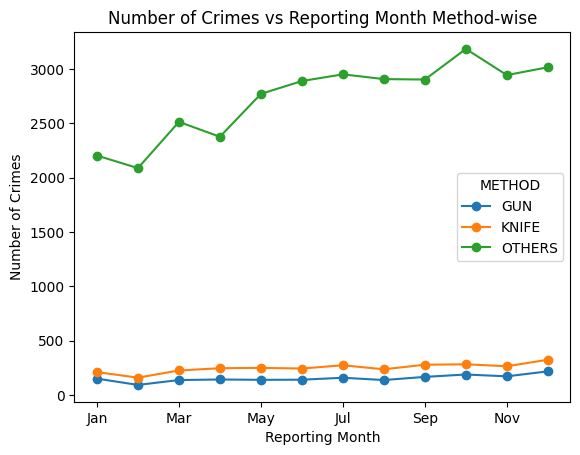

In [62]:
#Plotting a stacked bar plot for number of crime v/s reporting month method-wise

plt.figure(figsize=(10, 5))
df.groupby('REPORTING_MONTH')['METHOD'].value_counts().unstack().plot(kind='line', stacked=True, marker='o')
plt.title('Number of Crimes vs Reporting Month Method-wise')
plt.xlabel('Reporting Month')
plt.ylabel('Number of Crimes')
plt.savefig('Number_of_Crimes_vs_Reporting_Month_Method-wise.png')
plt.show()

<h2>Offense with Reporting Month</h2>

In [63]:
#Create a two-level datframe with top level as reporting month and bottom level as offense

df_pivot = df.pivot_table(index='REPORTING_MONTH', columns='OFFENSE', values='CASE_ID', aggfunc='count')
df_pivot.head(df['REPORTING_MONTH'].nunique())

OFFENSE,ARSON,ASSAULT,BURGLARY,HOMICIDE,MOTOR VEHICLE THEFT,OTHER THEFT,ROBBERY,SEX ABUSE
REPORTING_MONTH,,,,,,,,
Jan,1,142,328,9,860,619,231,14
Feb,1,130,270,6,822,625,224,10
Mar,6,176,313,7,938,760,305,9
Apr,4,183,304,11,835,766,263,11
May,4,204,350,13,956,904,325,16
Jun,4,200,351,9,1023,956,329,18
Jul,3,237,328,7,1038,976,347,16
Aug,3,183,294,13,1094,971,331,19
Sep,4,213,317,5,1094,900,356,15


In [64]:
#Statistical Distribution of data

df_pivot.describe()

OFFENSE,ARSON,ASSAULT,BURGLARY,HOMICIDE,MOTOR VEHICLE THEFT,OTHER THEFT,ROBBERY,SEX ABUSE
count,12.000000,12.000000,12.000000,12.000000,12.000000,12.000000,12.000000,12.000000
mean,3.583333,185.250000,316.583333,8.833333,1046.750000,830.083333,324.333333,14.333333
std,1.443376,30.869594,28.675166,2.823065,178.305216,123.737595,59.734767,3.084664
min,1.000000,130.000000,270.000000,5.000000,822.000000,619.000000,224.000000,9.000000
25%,3.000000,170.500000,301.500000,6.750000,918.500000,764.500000,294.500000,12.500000
50%,4.000000,191.000000,317.000000,8.500000,1030.500000,858.000000,330.000000,15.000000
75%,4.000000,202.500000,333.500000,11.250000,1139.250000,917.000000,362.750000,16.000000
max,6.000000,237.000000,356.000000,13.000000,1328.000000,976.000000,408.000000,19.000000


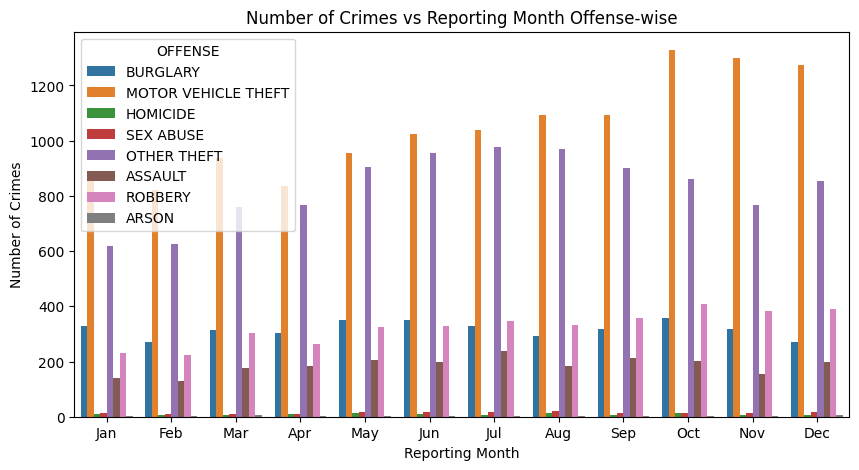

In [65]:
#Plotting a stacked bar plot for the number of crimes vs Reporting Month offense-wise

plt.figure(figsize=(10, 5))
sns.countplot(x='REPORTING_MONTH', hue='OFFENSE', data=df)
plt.title('Number of Crimes vs Reporting Month Offense-wise')
plt.xlabel('Reporting Month')
plt.ylabel('Number of Crimes')
plt.savefig('Number_of_Crimes_vs_Reporting_Month_Offense-wise.png')
plt.show()

<h2>District with Reporting Month</h2>

In [66]:
#Create a two-level datframe with top level as reporting month and bottom level as district

df_pivot = df.pivot_table(index='REPORTING_MONTH', columns='DISTRICT', values='CASE_ID', aggfunc='count')
df_pivot.head(df['REPORTING_MONTH'].nunique())

DISTRICT,1,2,3,4,5,6,7
REPORTING_MONTH,,,,,,,
Jan,265,440,326,305,259,320,289
Feb,246,386,441,270,258,249,238
Mar,321,511,530,290,287,302,273
Apr,309,505,424,291,273,286,289
May,384,503,519,361,332,342,331
Jun,440,532,505,365,350,418,280
Jul,460,496,501,354,364,427,350
Aug,411,534,550,390,332,367,324
Sep,491,515,508,341,359,370,320


In [67]:
#Statistical Distribution of data

df_pivot.describe()

DISTRICT,1,2,3,4,5,6,7
count,12.000000,12.000000,12.000000,12.000000,12.000000,12.000000,12.000000
mean,389.500000,499.416667,508.166667,346.250000,322.666667,358.000000,305.750000
std,83.500136,44.054632,84.024708,49.717612,43.077801,59.134669,32.226824
min,246.000000,386.000000,326.000000,270.000000,258.000000,249.000000,238.000000
25%,318.000000,501.250000,486.000000,301.500000,283.500000,315.500000,286.750000
50%,424.500000,510.500000,513.500000,357.500000,332.000000,368.500000,316.000000
75%,446.500000,523.000000,551.000000,370.000000,352.250000,418.250000,328.000000
max,491.000000,541.000000,661.000000,442.000000,385.000000,427.000000,350.000000


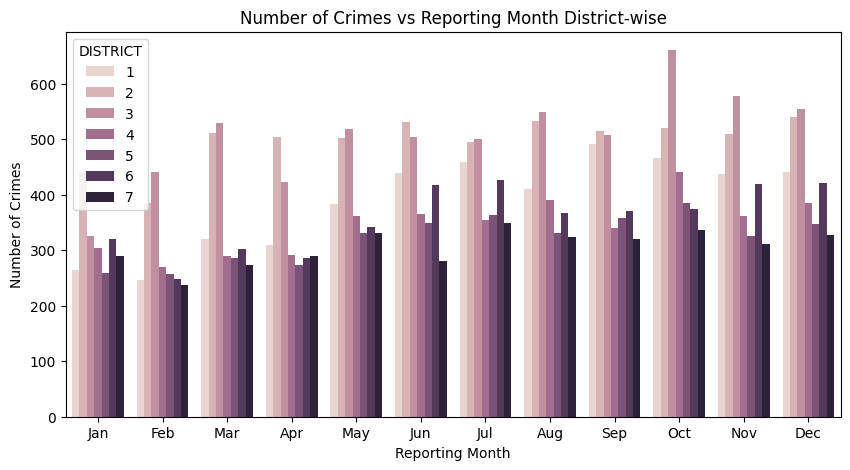

In [68]:
#Plotting a count plot for the number of crimes vs Reporting Month district-wise

plt.figure(figsize=(10, 5))
sns.countplot(x='REPORTING_MONTH', hue='DISTRICT', data=df)
plt.title('Number of Crimes vs Reporting Month District-wise')
plt.xlabel('Reporting Month')
plt.ylabel('Number of Crimes')
plt.savefig('Number_of_Crimes_vs_Reporting_Month_District-wise.png')
plt.show()

<h2>Reporting Month with Shift</h2>

In [69]:
#Create a two-level datframe with top level as shift and bottom level as reporting month

df_pivot = df.pivot_table(index='SHIFT', columns='REPORTING_MONTH', values='CASE_ID', aggfunc='count')
df_pivot.head(df['SHIFT'].nunique())

REPORTING_MONTH,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
SHIFT,,,,,,,,,,,,
DAY,847,834,990,871,1024,1108,1149,1122,1096,1237,1179,1268
EVENING,967,928,1078,1036,1186,1200,1185,1231,1258,1352,1273,1231
MIDNIGHT,390,326,446,470,562,582,618,555,550,597,493,518


In [70]:
#Statistical Distribution of data

df_pivot.describe()

REPORTING_MONTH,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
count,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000
mean,734.666667,696.000000,838.000000,792.333333,924.000000,963.333333,984.000000,969.333333,968.000000,1062.000000,981.666667,1005.666667
std,304.460725,323.857994,342.321486,291.084753,323.796232,333.432652,317.475983,362.938470,370.950131,406.786185,425.799640,422.736719
min,390.000000,326.000000,446.000000,470.000000,562.000000,582.000000,618.000000,555.000000,550.000000,597.000000,493.000000,518.000000
25%,618.500000,580.000000,718.000000,670.500000,793.000000,845.000000,883.500000,838.500000,823.000000,917.000000,836.000000,874.500000
50%,847.000000,834.000000,990.000000,871.000000,1024.000000,1108.000000,1149.000000,1122.000000,1096.000000,1237.000000,1179.000000,1231.000000
75%,907.000000,881.000000,1034.000000,953.500000,1105.000000,1154.000000,1167.000000,1176.500000,1177.000000,1294.500000,1226.000000,1249.500000
max,967.000000,928.000000,1078.000000,1036.000000,1186.000000,1200.000000,1185.000000,1231.000000,1258.000000,1352.000000,1273.000000,1268.000000


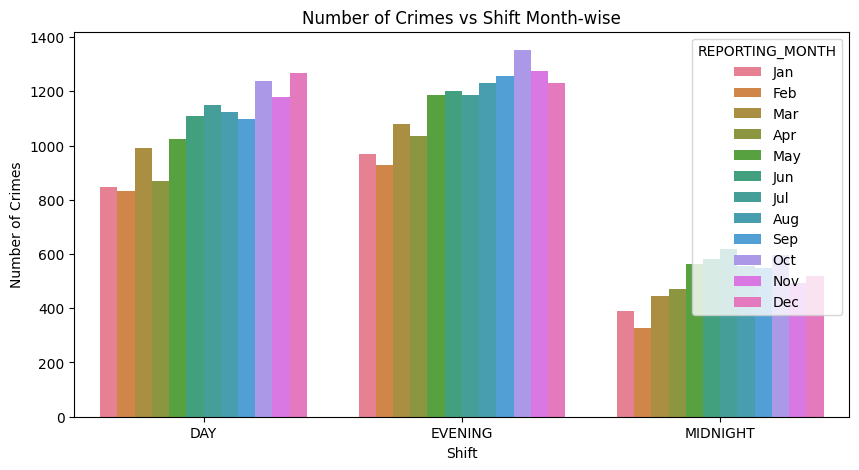

In [71]:
#Plotting a count plot for the number of crimes vs shift month-wise

plt.figure(figsize=(10, 5))
sns.countplot(x='SHIFT', hue='REPORTING_MONTH', data=df)
plt.title('Number of Crimes vs Shift Month-wise')
plt.xlabel('Shift')
plt.ylabel('Number of Crimes')
plt.savefig('Number_of_Crimes_vs_Shift_Month-wise.png')
plt.show()

<h2>Method with Shift</h2>

In [72]:
#Create a two-level datframe with top level as shift and bottom level as method

df_pivot = df.pivot_table(index='SHIFT', columns='METHOD', values='CASE_ID', aggfunc='count')
df_pivot.head(df['SHIFT'].nunique())

METHOD,GUN,KNIFE,OTHERS
SHIFT,,,
DAY,364,243,12118
EVENING,653,467,12805
MIDNIGHT,808,442,4857


In [73]:
#Statistical Distribution of data

df_pivot.describe()

METHOD,GUN,KNIFE,OTHERS
count,3.000000,3.000000,3.000000
mean,608.333333,384.000000,9926.666667
std,225.344921,122.747709,4403.876966
min,364.000000,243.000000,4857.000000
25%,508.500000,342.500000,8487.500000
50%,653.000000,442.000000,12118.000000
75%,730.500000,454.500000,12461.500000
max,808.000000,467.000000,12805.000000


<Figure size 1000x500 with 0 Axes>

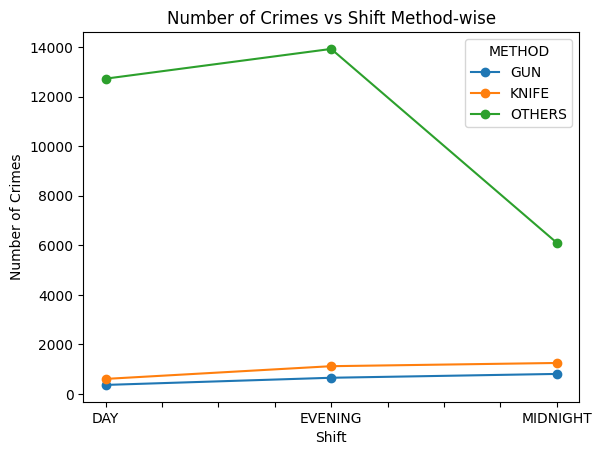

In [74]:
#Plotting a stacked bar plot for number of crime v/s shift method-wise

plt.figure(figsize=(10, 5))
df.groupby('SHIFT')['METHOD'].value_counts().unstack().plot(kind='line', stacked=True, marker='o')
plt.title('Number of Crimes vs Shift Method-wise')
plt.xlabel('Shift')
plt.ylabel('Number of Crimes')
plt.savefig('Number_of_Crimes_vs_Shift_Method-wise.png')
plt.show()

<h2>Offense with Shift</h2>

In [75]:
#Create a two-level datframe with top level as shift and bottom level as offense

df_pivot = df.pivot_table(index='SHIFT', columns='OFFENSE', values='CASE_ID', aggfunc='count')
df_pivot.head(df['SHIFT'].nunique())

OFFENSE,ARSON,ASSAULT,BURGLARY,HOMICIDE,MOTOR VEHICLE THEFT,OTHER THEFT,ROBBERY,SEX ABUSE
SHIFT,,,,,,,,
DAY,12.0,486.0,1299.0,NaN,6256.0,3731.0,885.0,56.0
EVENING,14.0,875.0,1792.0,NaN,4263.0,5292.0,1635.0,54.0
MIDNIGHT,17.0,862.0,708.0,106.0,2042.0,938.0,1372.0,62.0


In [76]:
#Statistical Distribution of data

df_pivot.describe()

OFFENSE,ARSON,ASSAULT,BURGLARY,HOMICIDE,MOTOR VEHICLE THEFT,OTHER THEFT,ROBBERY,SEX ABUSE
count,3.000000,3.000000,3.000000,1.0,3.000000,3.000000,3.000000,3.000000
mean,14.333333,741.000000,1266.333333,106.0,4187.000000,3320.333333,1297.333333,57.333333
std,2.516611,220.932116,542.737813,NaN,2108.027751,2205.859092,380.534274,4.163332
min,12.000000,486.000000,708.000000,106.0,2042.000000,938.000000,885.000000,54.000000
25%,13.000000,674.000000,1003.500000,106.0,3152.500000,2334.500000,1128.500000,55.000000
50%,14.000000,862.000000,1299.000000,106.0,4263.000000,3731.000000,1372.000000,56.000000
75%,15.500000,868.500000,1545.500000,106.0,5259.500000,4511.500000,1503.500000,59.000000
max,17.000000,875.000000,1792.000000,106.0,6256.000000,5292.000000,1635.000000,62.000000


<Figure size 1000x500 with 0 Axes>

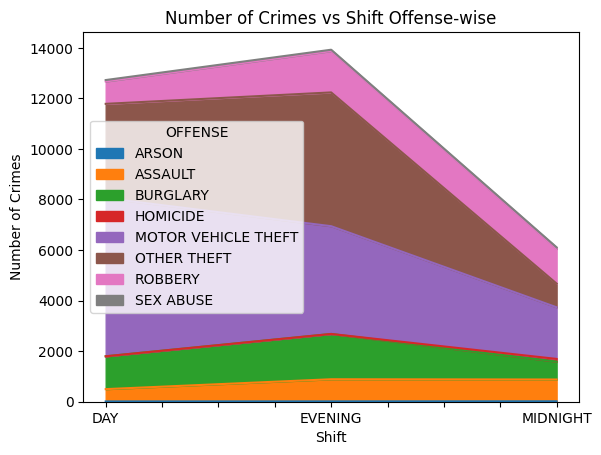

In [77]:
#Plotting a line plot for the number of crimes vs shift offense-wise

plt.figure(figsize=(10, 5))
df.groupby('SHIFT')['OFFENSE'].value_counts().unstack().plot(kind='area')
plt.title('Number of Crimes vs Shift Offense-wise')
plt.xlabel('Shift')
plt.ylabel('Number of Crimes')
plt.savefig('Number_of_Crimes_vs_Shift_Offense-wise.png')
plt.show()

<h2>District with Shift</h2>

In [78]:
#Create a two-level datframe with top level as shift and bottom level as district

df_pivot = df.pivot_table(index='SHIFT', columns='DISTRICT', values='CASE_ID', aggfunc='count')
df_pivot.head(df['SHIFT'].nunique())

DISTRICT,1,2,3,4,5,6,7
SHIFT,,,,,,,
DAY,1932,2417,2252,1652,1567,1637,1268
EVENING,1980,2775,2586,1758,1447,1845,1534
MIDNIGHT,762,801,1260,745,858,814,867


In [79]:
#Statistical Distribution of data

df_pivot.describe()

DISTRICT,1,2,3,4,5,6,7
count,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000
mean,1558.000000,1997.666667,2032.666667,1385.000000,1290.666667,1432.000000,1223.000000
std,689.773876,1051.688801,689.673353,556.784518,379.473758,545.214637,335.769266
min,762.000000,801.000000,1260.000000,745.000000,858.000000,814.000000,867.000000
25%,1347.000000,1609.000000,1756.000000,1198.500000,1152.500000,1225.500000,1067.500000
50%,1932.000000,2417.000000,2252.000000,1652.000000,1447.000000,1637.000000,1268.000000
75%,1956.000000,2596.000000,2419.000000,1705.000000,1507.000000,1741.000000,1401.000000
max,1980.000000,2775.000000,2586.000000,1758.000000,1567.000000,1845.000000,1534.000000


C:\Users\ADITYA\AppData\Local\Temp\ipykernel_19900\3704364050.py:4: FutureWarning: 

Setting a gradient palette using color= is deprecated and will be removed in v0.14.0. Set `palette='dark:r'` for the same effect.

  sns.countplot(x='SHIFT', hue='DISTRICT', data=df, color='r')


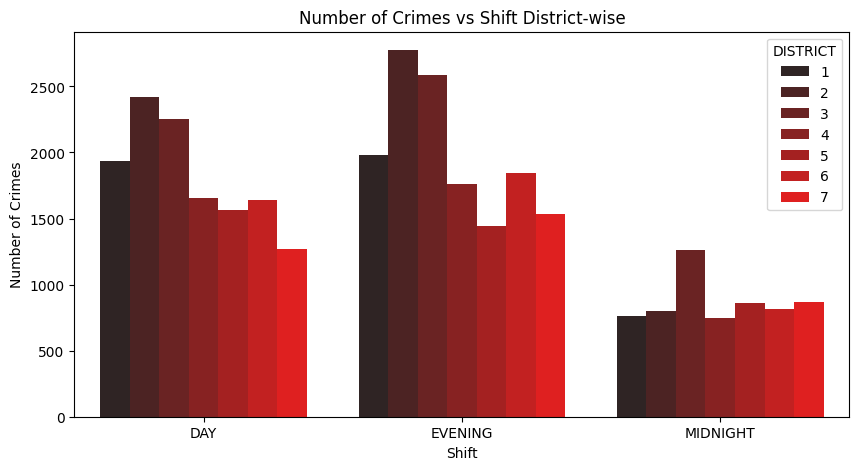

In [80]:
#Plotting a count plot for the number of crimes vs shift district-wise

plt.figure(figsize=(10, 5))
sns.countplot(x='SHIFT', hue='DISTRICT', data=df, color='r')
plt.title('Number of Crimes vs Shift District-wise')
plt.xlabel('Shift')
plt.ylabel('Number of Crimes')
plt.savefig('Number_of_Crimes_vs_Shift_District-wise.png')
plt.show()

<h2>Reporting Month with Method</h2>

In [81]:
#Create a two-level datframe with top level as method and bottom level as reporting month

df_pivot = df.pivot_table(index='METHOD', columns='REPORTING_MONTH', values='CASE_ID', aggfunc='count')
df_pivot.head(df['METHOD'].nunique())

REPORTING_MONTH,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
METHOD,,,,,,,,,,,,
GUN,149,91,136,141,138,139,157,136,165,187,170,216
KNIFE,60,67,88,104,110,103,115,99,112,94,93,107
OTHERS,1995,1930,2290,2132,2524,2648,2680,2673,2627,2905,2682,2694


In [82]:
#Statistical Distribution of data

df_pivot.describe()

REPORTING_MONTH,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
count,3.000000,3.000000,3.000000,3.000000,3.00000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000
mean,734.666667,696.000000,838.000000,792.333333,924.00000,963.333333,984.000000,969.333333,968.000000,1062.000000,981.666667,1005.666667
std,1092.387447,1068.742719,1257.697897,1160.332855,1385.71137,1459.075164,1468.929202,1475.534592,1436.980515,1596.762036,1473.035075,1463.154925
min,60.000000,67.000000,88.000000,104.000000,110.00000,103.000000,115.000000,99.000000,112.000000,94.000000,93.000000,107.000000
25%,104.500000,79.000000,112.000000,122.500000,124.00000,121.000000,136.000000,117.500000,138.500000,140.500000,131.500000,161.500000
50%,149.000000,91.000000,136.000000,141.000000,138.00000,139.000000,157.000000,136.000000,165.000000,187.000000,170.000000,216.000000
75%,1072.000000,1010.500000,1213.000000,1136.500000,1331.00000,1393.500000,1418.500000,1404.500000,1396.000000,1546.000000,1426.000000,1455.000000
max,1995.000000,1930.000000,2290.000000,2132.000000,2524.00000,2648.000000,2680.000000,2673.000000,2627.000000,2905.000000,2682.000000,2694.000000


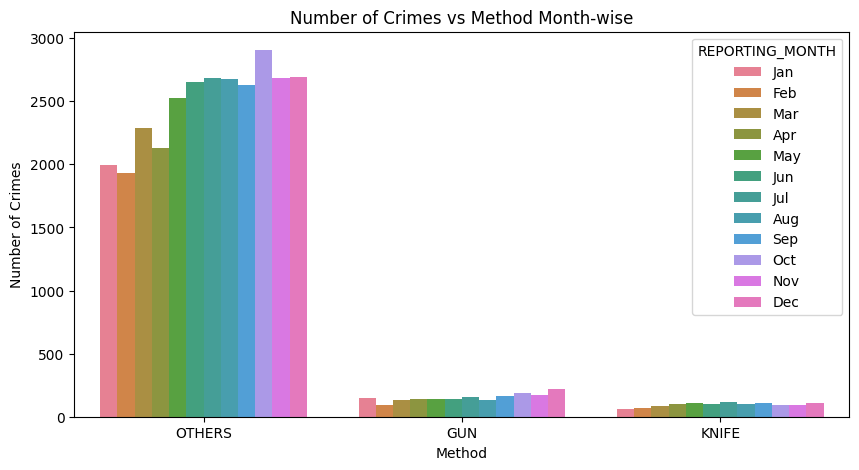

In [83]:
#Plotting a count plot for the number of crimes vs method month-wise

plt.figure(figsize=(10, 5))
sns.countplot(x='METHOD', hue='REPORTING_MONTH', data=df)
plt.title('Number of Crimes vs Method Month-wise')
plt.xlabel('Method')
plt.ylabel('Number of Crimes')
plt.savefig('Number_of_Crimes_vs_Method_Month-wise.png')
plt.show()

<h2>Shift with Method</h2>

In [84]:
#Create a two-level datframe with top level as method and bottom level as shift

df_pivot = df.pivot_table(index='METHOD', columns='SHIFT', values='CASE_ID', aggfunc='count')
df_pivot.head(df['METHOD'].nunique())

SHIFT,DAY,EVENING,MIDNIGHT
METHOD,,,
GUN,364,653,808
KNIFE,243,467,442
OTHERS,12118,12805,4857


In [85]:
#Statistical Distribution of data

df_pivot.describe()

SHIFT,DAY,EVENING,MIDNIGHT
count,3.000000,3.000000,3.000000
mean,4241.666667,4641.666667,2035.666667
std,6821.373053,7070.265719,2450.189857
min,243.000000,467.000000,442.000000
25%,303.500000,560.000000,625.000000
50%,364.000000,653.000000,808.000000
75%,6241.000000,6729.000000,2832.500000
max,12118.000000,12805.000000,4857.000000


<Figure size 1000x500 with 0 Axes>

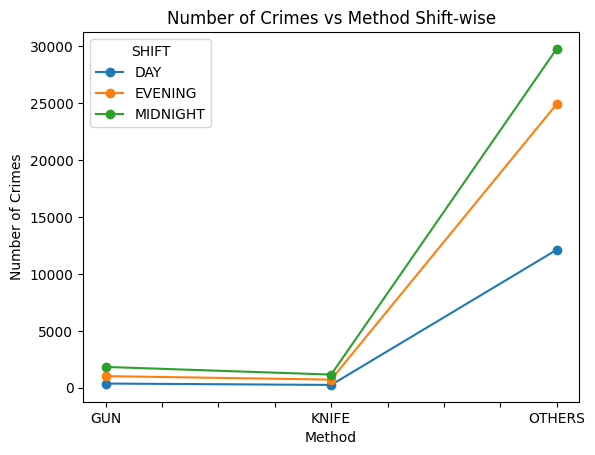

In [86]:
#Plotting a stacked bar plot for the number of crimes vs method shift-wise

plt.figure(figsize=(10, 5))
df.groupby('METHOD')['SHIFT'].value_counts().unstack().plot(kind='line', stacked=True, marker='o')
plt.title('Number of Crimes vs Method Shift-wise')
plt.xlabel('Method')
plt.ylabel('Number of Crimes')
plt.savefig('Number_of_Crimes_vs_Method_Shift-wise.png')
plt.show()

<h2>Offense with Method</h2>

In [87]:
#Create a two-level datframe with top level as method and bottom level as offense

df_pivot = df.pivot_table(index='METHOD', columns='OFFENSE', values='CASE_ID', aggfunc='count')
df_pivot.head(df['METHOD'].nunique())

OFFENSE,ARSON,ASSAULT,BURGLARY,HOMICIDE,MOTOR VEHICLE THEFT,OTHER THEFT,ROBBERY,SEX ABUSE
METHOD,,,,,,,,
GUN,NaN,548.0,5.0,77.0,5.0,7.0,1171.0,12.0
KNIFE,NaN,861.0,15.0,20.0,4.0,22.0,214.0,16.0
OTHERS,43.0,814.0,3779.0,9.0,12552.0,9932.0,2507.0,144.0


In [88]:
#Statistical Distribution of data

df_pivot.describe()

OFFENSE,ARSON,ASSAULT,BURGLARY,HOMICIDE,MOTOR VEHICLE THEFT,OTHER THEFT,ROBBERY,SEX ABUSE
count,1.0,3.000000,3.000000,3.000000,3.00000,3.000000,3.000000,3.000000
mean,43.0,741.000000,1266.333333,35.333333,4187.00000,3320.333333,1297.333333,57.333333
std,NaN,168.786848,2176.038909,36.501142,7244.30252,5725.876207,1151.708441,75.082177
min,43.0,548.000000,5.000000,9.000000,4.00000,7.000000,214.000000,12.000000
25%,43.0,681.000000,10.000000,14.500000,4.50000,14.500000,692.500000,14.000000
50%,43.0,814.000000,15.000000,20.000000,5.00000,22.000000,1171.000000,16.000000
75%,43.0,837.500000,1897.000000,48.500000,6278.50000,4977.000000,1839.000000,80.000000
max,43.0,861.000000,3779.000000,77.000000,12552.00000,9932.000000,2507.000000,144.000000


<Figure size 1000x500 with 0 Axes>

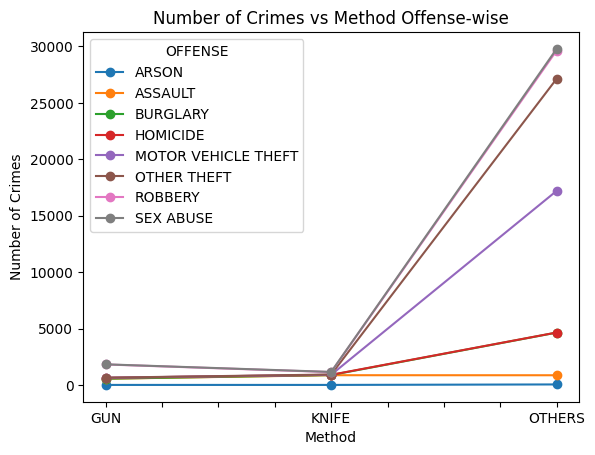

In [89]:
#Plotting a stacked bar plot for the number of crimes vs method district-wise

plt.figure(figsize=(10, 5))
df.groupby('METHOD')['OFFENSE'].value_counts().unstack().plot(kind='line', stacked=True, marker='o')
plt.title('Number of Crimes vs Method Offense-wise')
plt.xlabel('Method')
plt.ylabel('Number of Crimes')
plt.savefig('Number_of_Crimes_vs_Method_Offense-wise.png')
plt.show()

<h2>District with Method</h2>

In [90]:
#Create a two-level datframe with top level as method and bottom level as district

df_pivot = df.pivot_table(index='METHOD', columns='DISTRICT', values='CASE_ID', aggfunc='count')
df_pivot.head(df['METHOD'].nunique())

DISTRICT,1,2,3,4,5,6,7
METHOD,,,,,,,
GUN,174,60,239,198,288,403,463
KNIFE,133,49,186,146,166,242,230
OTHERS,4367,5884,5673,3811,3418,3651,2976


In [91]:
#Statistical Distribution of data

df_pivot.describe()

DISTRICT,1,2,3,4,5,6,7
count,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.00000
mean,1558.000000,1997.666667,2032.666667,1385.000000,1290.666667,1432.000000,1223.00000
std,2432.751734,3365.667888,3152.732519,2101.138501,1843.334298,1923.395695,1522.60599
min,133.000000,49.000000,186.000000,146.000000,166.000000,242.000000,230.00000
25%,153.500000,54.500000,212.500000,172.000000,227.000000,322.500000,346.50000
50%,174.000000,60.000000,239.000000,198.000000,288.000000,403.000000,463.00000
75%,2270.500000,2972.000000,2956.000000,2004.500000,1853.000000,2027.000000,1719.50000
max,4367.000000,5884.000000,5673.000000,3811.000000,3418.000000,3651.000000,2976.00000


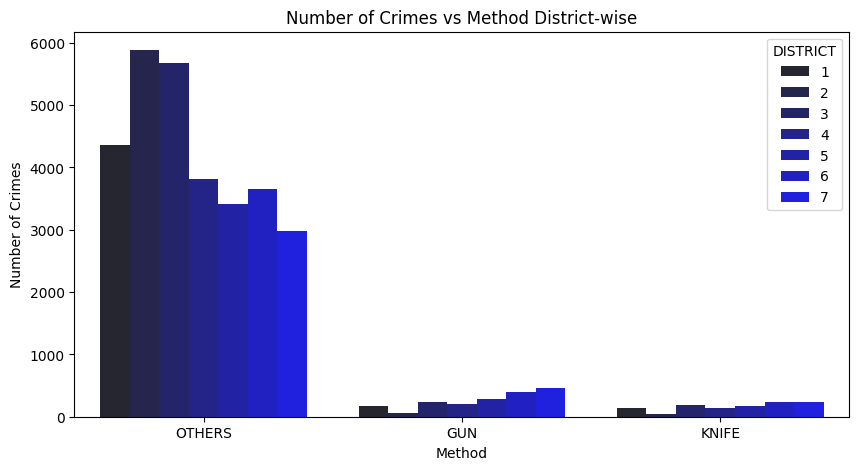

In [92]:
#Plotting a bar plot for the number of crimes vs method district-wise

plt.figure(figsize=(10, 5))
sns.countplot(x='METHOD', hue='DISTRICT', data=df, palette='dark:blue')
plt.title('Number of Crimes vs Method District-wise')
plt.xlabel('Method')
plt.ylabel('Number of Crimes')
plt.savefig('Number_of_Crimes_vs_Method_District-wise.png')
plt.show()

<h2>Reporting Month with Offense</h2>

In [93]:
#Create a two-level datframe with top level as offense and bottom level as month

df_pivot = df.pivot_table(index='OFFENSE', columns='REPORTING_MONTH', values='CASE_ID', aggfunc='count')
df_pivot.head(df['OFFENSE'].nunique())

REPORTING_MONTH,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
OFFENSE,,,,,,,,,,,,
ARSON,1,1,6,4,4,4,3,3,4,4,4,5
ASSAULT,142,130,176,183,204,200,237,183,213,202,154,199
BURGLARY,328,270,313,304,350,351,328,294,317,356,317,271
HOMICIDE,9,6,7,11,13,9,7,13,5,12,8,6
MOTOR VEHICLE THEFT,860,822,938,835,956,1023,1038,1094,1094,1328,1298,1275
OTHER THEFT,619,625,760,766,904,956,976,971,900,861,768,855
ROBBERY,231,224,305,263,325,329,347,331,356,408,383,390
SEX ABUSE,14,10,9,11,16,18,16,19,15,15,13,16


In [94]:
#Statistical Distribution of data

df_pivot.describe()

REPORTING_MONTH,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
count,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000
mean,275.500000,261.000000,314.250000,297.125000,346.500000,361.250000,369.000000,363.500000,363.000000,398.250000,368.125000,377.125000
std,315.537184,307.397834,356.481917,332.318022,385.604535,412.018637,418.365527,433.036455,418.422889,473.658934,456.953088,460.484663
min,1.000000,1.000000,6.000000,4.000000,4.000000,4.000000,3.000000,3.000000,4.000000,4.000000,4.000000,5.000000
25%,12.750000,9.000000,8.500000,11.000000,15.250000,15.750000,13.750000,17.500000,12.500000,14.250000,11.750000,13.500000
50%,186.500000,177.000000,240.500000,223.000000,264.500000,264.500000,282.500000,238.500000,265.000000,279.000000,235.500000,235.000000
75%,400.750000,358.750000,424.750000,419.500000,488.500000,502.250000,504.250000,491.000000,492.000000,521.250000,479.250000,506.250000
max,860.000000,822.000000,938.000000,835.000000,956.000000,1023.000000,1038.000000,1094.000000,1094.000000,1328.000000,1298.000000,1275.000000


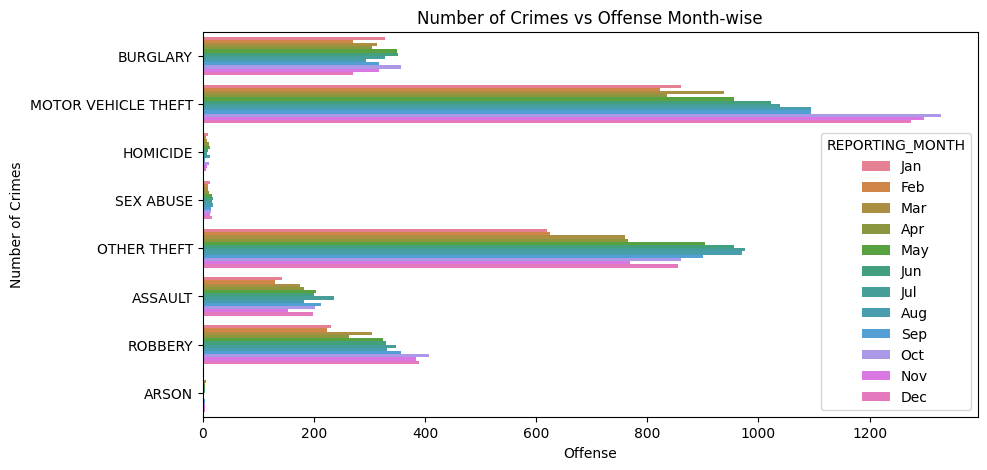

In [95]:
#Plotting a stacked bar plot for number of crimes vs offense month-wise

plt.figure(figsize=(10, 5))
sns.countplot(y='OFFENSE', hue='REPORTING_MONTH', data=df)
plt.title('Number of Crimes vs Offense Month-wise')
plt.xlabel('Offense')
plt.ylabel('Number of Crimes')
plt.savefig('Number_of_Crimes_vs_Offense_Month-wise.png')
plt.show()

<h2>Shift with Offense</h2>

In [96]:
#Create a two-level datframe with top level as offense and bottom level as shift

df_pivot = df.pivot_table(index='OFFENSE', columns='SHIFT', values='CASE_ID', aggfunc='count')
df_pivot.fillna(0, inplace=True)
df_pivot.head(df['OFFENSE'].nunique())

SHIFT,DAY,EVENING,MIDNIGHT
OFFENSE,,,
ARSON,12.0,14.0,17.0
ASSAULT,486.0,875.0,862.0
BURGLARY,1299.0,1792.0,708.0
HOMICIDE,0.0,0.0,106.0
MOTOR VEHICLE THEFT,6256.0,4263.0,2042.0
OTHER THEFT,3731.0,5292.0,938.0
ROBBERY,885.0,1635.0,1372.0
SEX ABUSE,56.0,54.0,62.0


In [97]:
#Statistical Distribution of data

df_pivot.describe()

SHIFT,DAY,EVENING,MIDNIGHT
count,8.000000,8.000000,8.000000
mean,1590.625000,1740.625000,763.375000
std,2252.848859,2021.083722,710.104406
min,0.000000,0.000000,17.000000
25%,45.000000,44.000000,95.000000
50%,685.500000,1255.000000,785.000000
75%,1907.000000,2409.750000,1046.500000
max,6256.000000,5292.000000,2042.000000


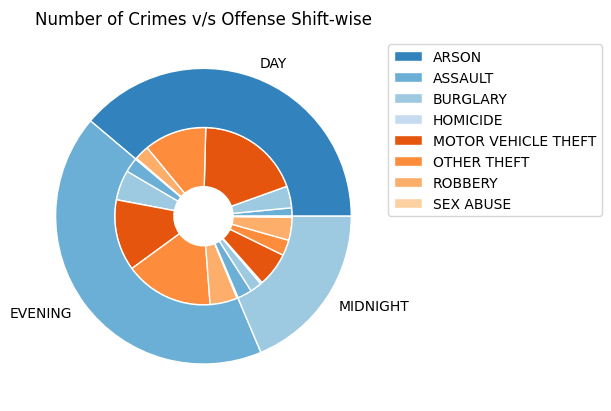

In [98]:
#Plotting a nested pie chart for number of crimes vs offense shift-wise

df_pivot_array = df_pivot.values.T
df_pivot_array

fig, ax = plt.subplots()
size = 0.4

cmap = plt.get_cmap('tab20c')
outer_colors = cmap(np.arange(3)*1)
inner_colors = cmap(np.arange(8)*1)

outer_labels = df_pivot.columns.to_list()
inner_labels = df_pivot.index.to_list()

l2=ax.pie(df_pivot_array.flatten(), radius=1-size, colors=inner_colors, wedgeprops=dict(width=size, edgecolor='w'))
l1=ax.pie(df_pivot_array.sum(axis=1), radius=1, colors=outer_colors, labels =outer_labels, wedgeprops=dict(width=size, edgecolor='w'))


ax.legend(inner_labels, loc=(1,0.5))
ax.set(aspect='equal', title='Number of Crimes v/s Offense Shift-wise')
plt.savefig('Number_of_Crimes_vs_Offense_Shift-wise.png')
plt.show()

<h2>Method with Offense</h2>

In [99]:
#Create a two-level datframe with top level as offense and bottom level as method

df_pivot = df.pivot_table(index='OFFENSE', columns='METHOD', values='CASE_ID', aggfunc='count')
df_pivot.fillna(0, inplace=True)
df_pivot.head(df['OFFENSE'].nunique())

METHOD,GUN,KNIFE,OTHERS
OFFENSE,,,
ARSON,0.0,0.0,43.0
ASSAULT,548.0,861.0,814.0
BURGLARY,5.0,15.0,3779.0
HOMICIDE,77.0,20.0,9.0
MOTOR VEHICLE THEFT,5.0,4.0,12552.0
OTHER THEFT,7.0,22.0,9932.0
ROBBERY,1171.0,214.0,2507.0
SEX ABUSE,12.0,16.0,144.0


In [100]:
#Statistical Distribution of data

df_pivot.describe()

METHOD,GUN,KNIFE,OTHERS
count,8.000000,8.000000,8.00000
mean,228.125000,144.000000,3722.50000
std,424.497834,298.235286,4878.41353
min,0.000000,0.000000,9.00000
25%,5.000000,12.250000,118.75000
50%,9.500000,18.000000,1660.50000
75%,194.750000,70.000000,5317.25000
max,1171.000000,861.000000,12552.00000


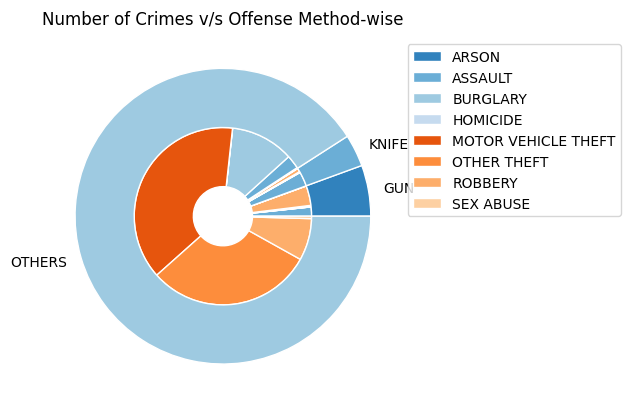

In [101]:
#Plotting a nested pie chart for number of crimes vs offense method-wise

df_pivot_array = df_pivot.values.T
df_pivot_array

fig, ax = plt.subplots()
size = 0.4

cmap = plt.get_cmap('tab20c')
outer_colors = cmap(np.arange(3)*1)
inner_colors = cmap(np.arange(8)*1)

outer_labels = df_pivot.columns.to_list()
inner_labels = df_pivot.index.to_list()

l2=ax.pie(df_pivot_array.flatten(), radius=1-size, colors=inner_colors, wedgeprops=dict(width=size, edgecolor='w'))
l1=ax.pie(df_pivot_array.sum(axis=1), radius=1, colors=outer_colors, labels =outer_labels, wedgeprops=dict(width=size, edgecolor='w'))


ax.legend(inner_labels, loc=(1,0.5))
ax.set(aspect='equal', title='Number of Crimes v/s Offense Method-wise')
plt.savefig('Number_of_Crimes_vs_Offense_Method-wise.png')
plt.show()


<h2>District with Offense</h2>

In [102]:
#Create a two-level datframe with top level as offense and bottom level as district

df_pivot = df.pivot_table(index='OFFENSE', columns='DISTRICT', values='CASE_ID', aggfunc='count')
df_pivot.head(df['OFFENSE'].nunique())

DISTRICT,1,2,3,4,5,6,7
OFFENSE,,,,,,,
ARSON,5,1,4,5,11,12,5
ASSAULT,226,116,274,251,329,496,531
BURGLARY,343,527,545,486,514,587,797
HOMICIDE,3,4,10,18,24,27,20
MOTOR VEHICLE THEFT,1832,2018,2597,1831,1634,1631,1018
OTHER THEFT,1703,2983,1784,1073,891,920,607
ROBBERY,541,323,858,464,449,598,659
SEX ABUSE,21,21,26,27,20,25,32


In [103]:
#Statistical Distribution of data

df_pivot.describe()

DISTRICT,1,2,3,4,5,6,7
count,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000
mean,584.250000,749.125000,762.250000,519.375000,484.000000,537.000000,458.625000
std,754.749675,1126.123495,955.280176,639.358817,556.124858,554.113965,391.877874
min,3.000000,1.000000,4.000000,5.000000,11.000000,12.000000,5.000000
25%,17.000000,16.750000,22.000000,24.750000,23.000000,26.500000,29.000000
50%,284.500000,219.500000,409.500000,357.500000,389.000000,541.500000,569.000000
75%,831.500000,899.750000,1089.500000,632.750000,608.250000,678.500000,693.500000
max,1832.000000,2983.000000,2597.000000,1831.000000,1634.000000,1631.000000,1018.000000


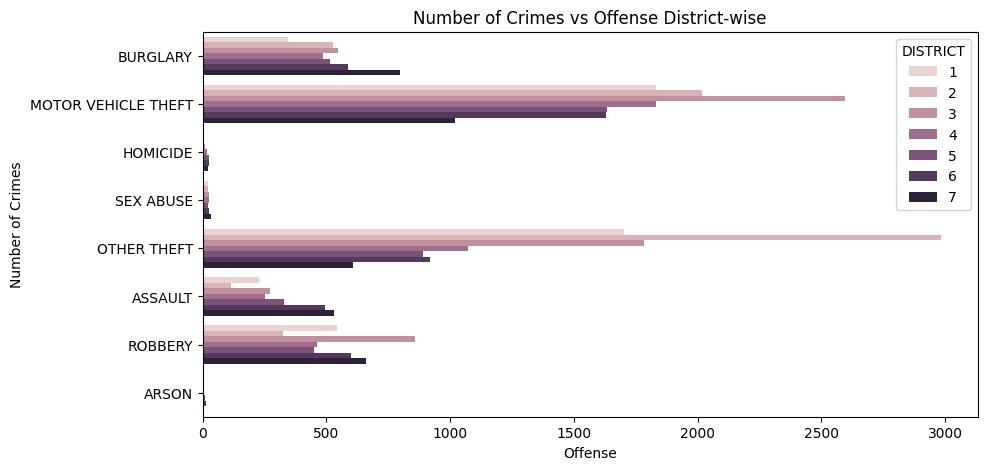

In [104]:
#Plotting a bar plot for number of crimes vs offense district-wise

plt.figure(figsize=(10, 5))
sns.countplot(y='OFFENSE', hue='DISTRICT', data=df)
plt.title('Number of Crimes vs Offense District-wise')
plt.xlabel('Offense')
plt.ylabel('Number of Crimes')
plt.savefig('Number_of_Crimes_vs_Offense_District-wise.png')
plt.show()

<h2>Reporting Month with District</h2>

In [105]:
#Create a two-level datframe with top level as district and bottom level as month

df_pivot = df.pivot_table(index='DISTRICT', columns='REPORTING_MONTH', values='CASE_ID', aggfunc='count')
df_pivot.head(df['DISTRICT'].nunique())

REPORTING_MONTH,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
DISTRICT,,,,,,,,,,,,
1,265,246,321,309,384,440,460,411,491,467,438,442
2,440,386,511,505,503,532,496,534,515,520,510,541
3,326,441,530,424,519,505,501,550,508,661,579,554
4,305,270,290,291,361,365,354,390,341,442,361,385
5,259,258,287,273,332,350,364,332,359,385,326,347
6,320,249,302,286,342,418,427,367,370,375,419,421
7,289,238,273,289,331,280,350,324,320,336,312,327


In [106]:
#Statistical Distribution of data

df_pivot.describe()

REPORTING_MONTH,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
count,7.000000,7.000000,7.000000,7.000000,7.00000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000
mean,314.857143,298.285714,359.142857,339.571429,396.00000,412.857143,421.714286,415.428571,414.857143,455.142857,420.714286,431.000000
std,60.804135,80.912946,111.339464,89.113892,80.81254,88.826476,66.278992,91.742133,85.719365,109.874821,98.050521,88.917565
min,259.000000,238.000000,273.000000,273.000000,331.00000,280.000000,350.000000,324.000000,320.000000,336.000000,312.000000,327.000000
25%,277.000000,247.500000,288.500000,287.500000,337.00000,357.500000,359.000000,349.500000,350.000000,380.000000,343.500000,366.000000
50%,305.000000,258.000000,302.000000,291.000000,361.00000,418.000000,427.000000,390.000000,370.000000,442.000000,419.000000,421.000000
75%,323.000000,328.000000,416.000000,366.500000,443.50000,472.500000,478.000000,472.500000,499.500000,493.500000,474.000000,491.500000
max,440.000000,441.000000,530.000000,505.000000,519.00000,532.000000,501.000000,550.000000,515.000000,661.000000,579.000000,554.000000


<Figure size 1000x500 with 0 Axes>

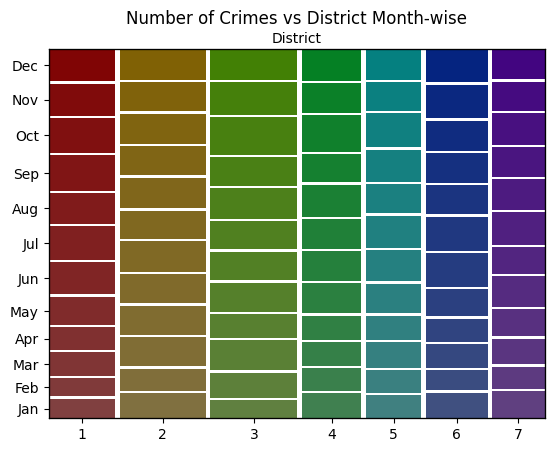

In [107]:
#Plotting a mosiac plot of number of crimes vs district month-wise

plt.figure(figsize=(10, 5))
mosaic(df_pivot.stack(), labelizer=lambda k:'', gap=0.01)
plt.title('Number of Crimes vs District Month-wise')
plt.xlabel('District')
plt.ylabel('Reporting Month')
plt.savefig('Number_of_Crimes_vs_District_Month-wise.png')
plt.show()

<h2>Shift with District</h2>

In [108]:
#Create a two-level datframe with top level as district and bottom level as shift

df_pivot = df.pivot_table(index='DISTRICT', columns='SHIFT', values='CASE_ID', aggfunc='count')
df_pivot.head(df['DISTRICT'].nunique())

SHIFT,DAY,EVENING,MIDNIGHT
DISTRICT,,,
1,1932,1980,762
2,2417,2775,801
3,2252,2586,1260
4,1652,1758,745
5,1567,1447,858
6,1637,1845,814
7,1268,1534,867


In [109]:
#Statistical Distribution of data

df_pivot.describe()

SHIFT,DAY,EVENING,MIDNIGHT
count,7.000000,7.000000,7.000000
mean,1817.857143,1989.285714,872.428571
std,405.374489,508.129155,176.728471
min,1268.000000,1447.000000,745.000000
25%,1602.000000,1646.000000,781.500000
50%,1652.000000,1845.000000,814.000000
75%,2092.000000,2283.000000,862.500000
max,2417.000000,2775.000000,1260.000000


<Figure size 1000x500 with 0 Axes>

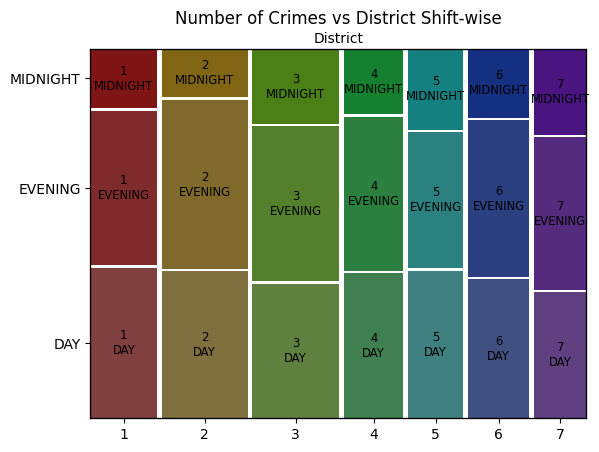

In [110]:
#Plotting a mosiac plot of number of crimes vs district shift-wise

plt.figure(figsize=(10, 5))
mosaic(df_pivot.stack(), gap=0.01)
plt.title('Number of Crimes vs District Shift-wise')
plt.xlabel('District')
plt.ylabel('Shift')
plt.savefig('Number_of_Crimes_vs_District_Shift-wise.png')
plt.show()

<h2>Method with District</h2>

In [111]:
#Create a two-level datframe with top level as district and bottom level as method

df_pivot = df.pivot_table(index='DISTRICT', columns='METHOD', values='CASE_ID', aggfunc='count')
df_pivot.head(df['DISTRICT'].nunique())

METHOD,GUN,KNIFE,OTHERS
DISTRICT,,,
1,174,133,4367
2,60,49,5884
3,239,186,5673
4,198,146,3811
5,288,166,3418
6,403,242,3651
7,463,230,2976


In [112]:
#Statistical Distribution of data

df_pivot.describe()

METHOD,GUN,KNIFE,OTHERS
count,7.000000,7.000000,7.000000
mean,260.714286,164.571429,4254.285714
std,137.912671,65.109797,1123.630087
min,60.000000,49.000000,2976.000000
25%,186.000000,139.500000,3534.500000
50%,239.000000,166.000000,3811.000000
75%,345.500000,208.000000,5020.000000
max,463.000000,242.000000,5884.000000


<Figure size 1000x500 with 0 Axes>

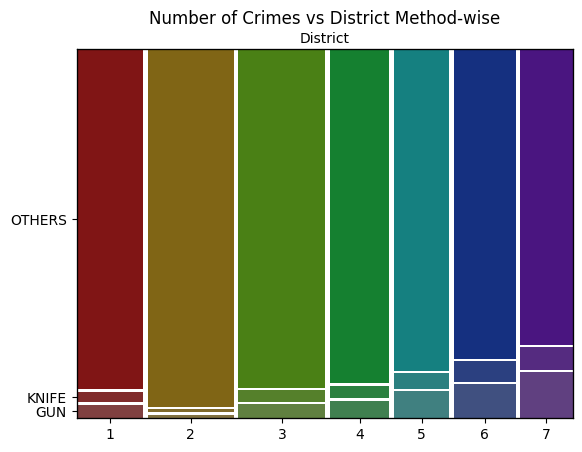

In [113]:
#Plotting a mosiac plot of number of crimes vs district method-wise

plt.figure(figsize=(10, 5))
mosaic(df_pivot.stack(), gap=0.01, labelizer=lambda k:'')
plt.title('Number of Crimes vs District Method-wise')
plt.xlabel('District')
plt.ylabel('Method')
plt.savefig('Number_of_Crimes_vs_District_Method-wise.png')
plt.show()

<h2>Offense with District</h2>

In [114]:
#Create a two-level datframe with top level as district and bottom level as offense

df_pivot = df.pivot_table(index='DISTRICT', columns='OFFENSE', values='CASE_ID', aggfunc='count')
df_pivot.head(df['DISTRICT'].nunique())

OFFENSE,ARSON,ASSAULT,BURGLARY,HOMICIDE,MOTOR VEHICLE THEFT,OTHER THEFT,ROBBERY,SEX ABUSE
DISTRICT,,,,,,,,
1,5,226,343,3,1832,1703,541,21
2,1,116,527,4,2018,2983,323,21
3,4,274,545,10,2597,1784,858,26
4,5,251,486,18,1831,1073,464,27
5,11,329,514,24,1634,891,449,20
6,12,496,587,27,1631,920,598,25
7,5,531,797,20,1018,607,659,32


In [115]:
#Statistical Distribution of data

df_pivot.describe()

OFFENSE,ARSON,ASSAULT,BURGLARY,HOMICIDE,MOTOR VEHICLE THEFT,OTHER THEFT,ROBBERY,SEX ABUSE
count,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000
mean,6.142857,317.571429,542.714286,15.142857,1794.428571,1423.000000,556.000000,24.571429
std,3.933979,148.809562,135.892990,9.564319,474.717761,813.091836,172.242078,4.276180
min,1.000000,116.000000,343.000000,3.000000,1018.000000,607.000000,323.000000,20.000000
25%,4.500000,238.500000,500.000000,7.000000,1632.500000,905.500000,456.500000,21.000000
50%,5.000000,274.000000,527.000000,18.000000,1831.000000,1073.000000,541.000000,25.000000
75%,8.000000,412.500000,566.000000,22.000000,1925.000000,1743.500000,628.500000,26.500000
max,12.000000,531.000000,797.000000,27.000000,2597.000000,2983.000000,858.000000,32.000000


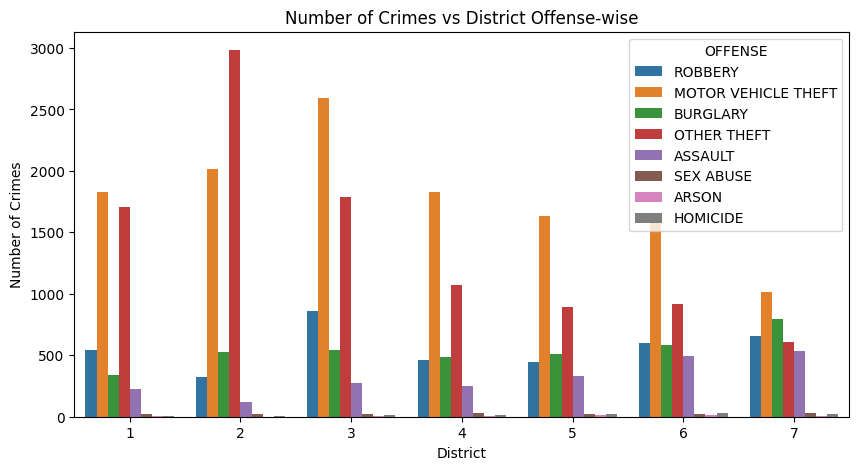

In [116]:
#Plotting a bar plot of number of crimes vs district offense-wise

plt.figure(figsize=(10, 5))
sns.countplot(x='DISTRICT', hue='OFFENSE', data=df)
plt.title('Number of Crimes vs District Offense-wise')
plt.xlabel('District')
plt.ylabel('Number of Crimes')
plt.savefig('Number_of_Crimes_vs_District_Offense-wise.png')
plt.show()

<h1>Dependencies between Fields</h1>

<p>In this section, we will be checking whether any of our primary field is dependent on other primary fields. For this task, we will be performing chi-squared test under the null hypothesis of independence for our 10 primary fields pairs. On performing a chi-squared test, we will obtain a p-value which will help us decide whether to reject our null hypothesis of independence or accept it.</p>

### Interpretation of p > 0.05 in a Chi-Squared Test

- **No Significant Association:** No strong evidence of an association between categorical variables.

- **Fail to Reject Null Hypothesis:** Data does not provide enough evidence to reject the assumption of independence between variables.

- **Independence Assumption:** Observed frequencies in the contingency table are not significantly different from expected frequencies under independence.

- **Caution in Interpretation:** Lack of statistical significance doesn't imply the absence of an association; it suggests insufficient evidence based on the data.


### Interpretation of \( p < 0.05 \) in a Chi-Squared Test

- **Significant Association:** Strong evidence of an association between categorical variables.

- **Reject Null Hypothesis:** Data provides sufficient evidence to reject the assumption of independence between variables.

- **Dependent Variables:** Observed frequencies in the contingency table significantly differ from expected frequencies under independence.

- **Interpretation Confidence:** Confidence in concluding that a relationship exists based on the observed data.

<h2>Reporting Month & Shift</h2>

In [117]:
# Perform chi-squared test on month and shift
obs = pd.crosstab(df['REPORTING_MONTH'], df['SHIFT'])
chi2, p, dof, ex = chi_squared_test(obs)
print('Chi-squared Test for Reporting Month and Shift\n')
print('Chi-squared:', chi2)
print('P-value:', p)
print('Degrees of Freedom:', dof)
if p > 0.05:
    print('\nAccept Null Hypothesis. This means that the two columns are independent of each other.')
else:
    print('\nReject Null Hypothesis. This means that the two columns are dependent on each other.')

Chi-squared Test for Reporting Month and Shift

Chi-squared: 67.12016760566898
P-value: 1.8628321183541214e-06
Degrees of Freedom: 22

Reject Null Hypothesis. This means that the two columns are dependent on each other.


<h2>Reporting Month & Method</h2>

In [118]:
#Performing chi-squared test on month and method

obs = pd.crosstab(df['REPORTING_MONTH'], df['METHOD'])
chi2, p, dof, ex = chi_squared_test(obs)
print('Chi-squared Test for Reporting Month and Method\n')
print('Chi-squared:', chi2)
print('P-value:', p)    
print('Degrees of Freedom:', dof)
if p > 0.05:
    print('\nAccept Null Hypothesis. This means that the two columns are independent of each other.')
else:
    print('\nReject Null Hypothesis. This means that the two columns are dependent on each other.')

Chi-squared Test for Reporting Month and Method

Chi-squared: 55.31284654838185
P-value: 0.00010720008761011697
Degrees of Freedom: 22

Reject Null Hypothesis. This means that the two columns are dependent on each other.


<h2>Reporting Month & Offense</h2>

In [119]:
##Performing chi-squared test on month and offense

obs = pd.crosstab(df['REPORTING_MONTH'], df['OFFENSE'])
chi2, p, dof, ex = chi_squared_test(obs)
print('Chi-squared Test for Reporting Month and Offense\n')
print('Chi-squared:', chi2)
print('P-value:', p)
print('Degrees of Freedom:', dof)
if p > 0.05:
    print('\nAccept Null Hypothesis. This means that the two columns are independent of each other.')
else:
    print('\nReject Null Hypothesis. This means that the two columns are dependent on each other.')

Chi-squared Test for Reporting Month and Offense

Chi-squared: 270.763759741085
P-value: 2.2383298469064217e-23
Degrees of Freedom: 77

Reject Null Hypothesis. This means that the two columns are dependent on each other.


<h2>Reporting Month & District</h2>

In [120]:
#Performing chi-squared test on month and district

obs = pd.crosstab(df['REPORTING_MONTH'], df['DISTRICT'])
chi2, p, dof, ex = chi_squared_test(obs)
print('Chi-squared Test for Reporting Month and District\n')
print('Chi-squared:', chi2)
print('P-value:', p)
print('Degrees of Freedom:', dof)
if p > 0.05:
    print('\nAccept Null Hypothesis. This means that the two columns are independent of each other.')
else:
    print('\nReject Null Hypothesis. This means that the two columns are dependent on each other.')

Chi-squared Test for Reporting Month and District

Chi-squared: 197.82686035288418
P-value: 4.337257326264125e-15
Degrees of Freedom: 66

Reject Null Hypothesis. This means that the two columns are dependent on each other.


<h2>Shift & Method</h2>

In [121]:
#Performing chi-squared test on shift and method

obs = pd.crosstab(df['SHIFT'], df['METHOD'])
chi2, p, dof, ex = chi_squared_test(obs)
print('Chi-squared Test for Shift and Method\n')
print('Chi-squared:', chi2)
print('P-value:', p)
print('Degrees of Freedom:', dof)
if p > 0.05:
    print('\nAccept Null Hypothesis. This means that the two columns are independent of each other.')
else:
    print('\nReject Null Hypothesis. This means that the two columns are dependent on each other.')

Chi-squared Test for Shift and Method

Chi-squared: 1280.0432126218166
P-value: 7.0635129942006556e-276
Degrees of Freedom: 4

Reject Null Hypothesis. This means that the two columns are dependent on each other.


<h2>Shift & Offense</h2>

In [122]:
#Performing chi-squared test on shift and offense

obs = pd.crosstab(df['SHIFT'], df['OFFENSE'])
chi2, p, dof, ex = chi_squared_test(obs)
print('Chi-squared Test for Shift and Offense\n')
print('Chi-squared:', chi2)
print('P-value:', p)
print('Degrees of Freedom:', dof)
if p > 0.05:
    print('\nAccept Null Hypothesis. This means that the two columns are independent of each other.')
else:
    print('\nReject Null Hypothesis. This means that the two columns are dependent on each other.')

Chi-squared Test for Shift and Offense

Chi-squared: 3407.5562408858827
P-value: 0.0
Degrees of Freedom: 14

Reject Null Hypothesis. This means that the two columns are dependent on each other.


<h2>Shift & District</h2>

In [123]:
#Performing chi-squared test on shift and district

obs = pd.crosstab(df['SHIFT'], df['DISTRICT'])
chi2, p, dof, ex = chi_squared_test(obs)
print('Chi-squared Test for Shift and District\n')
print('Chi-squared:', chi2)
print('P-value:', p)
print('Degrees of Freedom:', dof)
if p > 0.05:
    print('\nAccept Null Hypothesis. This means that the two columns are independent of each other.')
else:
    print('\nReject Null Hypothesis. This means that the two columns are dependent on each other.')

Chi-squared Test for Shift and District

Chi-squared: 275.7103278734238
P-value: 5.809254683836702e-52
Degrees of Freedom: 12

Reject Null Hypothesis. This means that the two columns are dependent on each other.


<h2>Method & Offense</h2>

In [124]:
#Performing chi-squared test on method and offense

obs = pd.crosstab(df['METHOD'], df['OFFENSE'])
chi2, p, dof, ex = chi_squared_test(obs)
print('Chi-squared Test for Method and Offense\n')
print('Chi-squared:', chi2)
print('P-value:', p)
print('Degrees of Freedom:', dof)
if p > 0.05:
    print('\nAccept Null Hypothesis. This means that the two columns are independent of each other.')
else:
    print('\nReject Null Hypothesis. This means that the two columns are dependent on each other.')

Chi-squared Test for Method and Offense

Chi-squared: 18090.27245523568
P-value: 0.0
Degrees of Freedom: 14

Reject Null Hypothesis. This means that the two columns are dependent on each other.


<h2>Method & District</h2>

In [125]:
#Performing chi-squared test on method and district

obs = pd.crosstab(df['METHOD'], df['DISTRICT'])
chi2, p, dof, ex = chi_squared_test(obs)
print('Chi-squared Test for Method and District\n')
print('Chi-squared:', chi2)
print('P-value:', p)
print('Degrees of Freedom:', dof)
if p > 0.05:
    print('\nAccept Null Hypothesis. This means that the two columns are independent of each other.')
else:
    print('\nReject Null Hypothesis. This means that the two columns are dependent on each other.')

Chi-squared Test for Method and District

Chi-squared: 1125.1963441040152
P-value: 2.1998785400330247e-233
Degrees of Freedom: 12

Reject Null Hypothesis. This means that the two columns are dependent on each other.


<h2>Offense & District</h2>

In [126]:
#Performing chi-squared test on offense and district

obs = pd.crosstab(df['OFFENSE'], df['DISTRICT'])
chi2, p, dof, ex = chi_squared_test(obs)
print('Chi-squared Test for Offense and District\n')
print('Chi-squared:', chi2)
print('P-value:', p)
print('Degrees of Freedom:', dof)
if p > 0.05:
    print('\nAccept Null Hypothesis. This means that the two columns are independent of each other.')
else:
    print('\nReject Null Hypothesis. This means that the two columns are dependent on each other.')

Chi-squared Test for Offense and District

Chi-squared: 3191.4531742862864
P-value: 0.0
Degrees of Freedom: 42

Reject Null Hypothesis. This means that the two columns are dependent on each other.


## Proportion Distribution: An alternate to the Central Limit Theorem (CLT)

When dealing with categorical data, we often want to understand the distribution of proportions of different categories within a dataset. Proportion distribution refers to the distribution of the relative frequencies of each category within a sample or population. It helps us understand how the proportions of different categories vary across different samples or populations.

Proportion distribution is similar to the Central Limit Theorem (CLT) in the context of sampling from a population. According to the CLT, the distribution of sample means approaches a normal distribution as the sample size increases, regardless of the shape of the population distribution, under certain conditions.

Similarly, when we repeatedly sample from a population and compute the proportions of different categories within each sample, the distribution of these proportions tends to approximate a normal distribution as the sample size increases. This is known as the proportion distribution and is analogous to the CLT for sample means.

In essence, both the CLT and proportion distribution deal with the behavior of sample statistics (means and proportions, respectively) as we take multiple samples from a population. They both demonstrate the tendency of sample statistics to follow a normal distribution, making them valuable tools in statistical analysis and inference.

In this section, we will be examining the proportion distribution of each unique value for each of our primary fields. Since all of our columns are interdependent, we expect that the proportion distribution will faintly approximate a normal distribution.


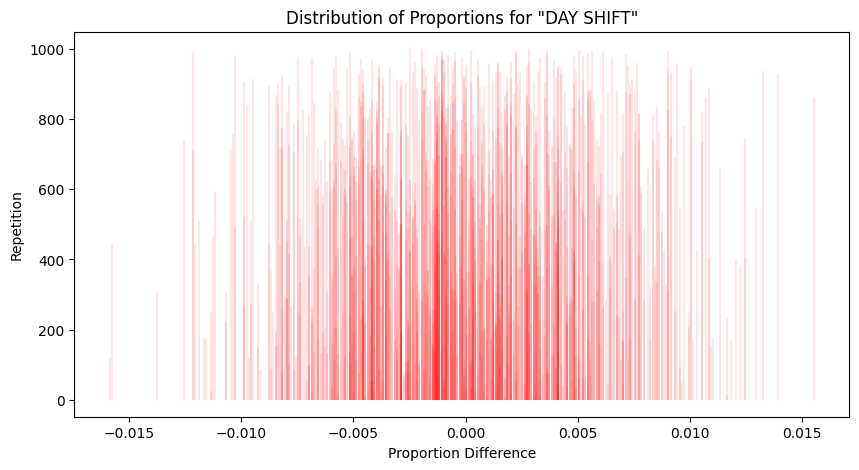

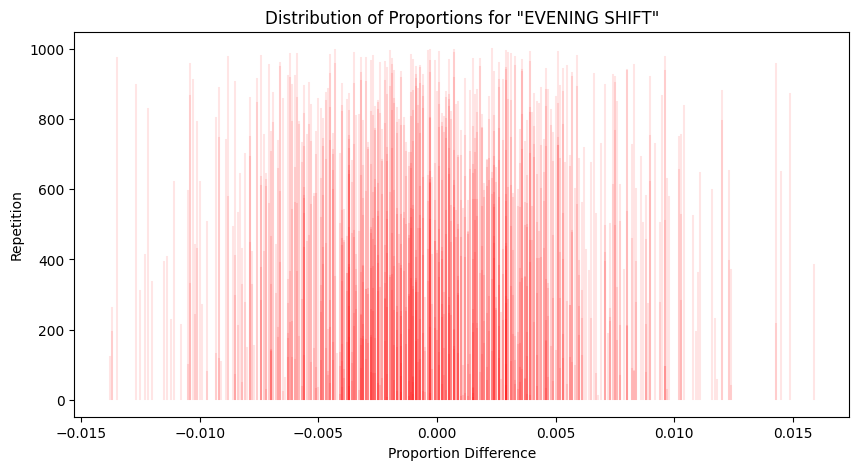

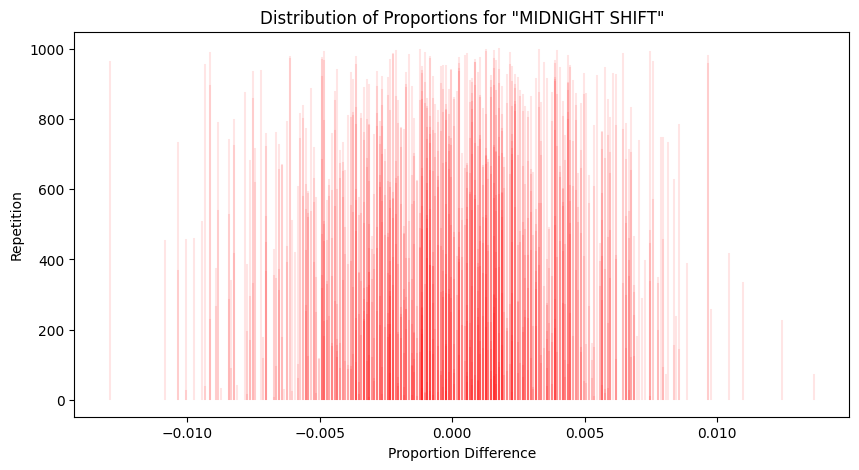

In [127]:
# Checking if Sample Proportion Graph for Shifts converge to Normal Distribution (CLT variation)

# Get unique values in the field
obs_col = "SHIFT"
unique_obs_val = df[obs_col].unique()

# Number of repetitions
num_repetitions = 1000
# Number of values to sample for each repetition
num_values_to_sample = 10000

# Repeat sampling and proportion calculation
for obs_val in unique_obs_val:
    plt.figure(figsize=(10, 5))
    plt.title(f'Distribution of Proportions for "{obs_val} {obs_col}"')
    plt.ylabel('Repetition') 
    plt.xlabel('Proportion Difference')  
    obs_mean = (df[obs_col] == obs_val).mean()
    
    for _ in range(num_repetitions):
        # Randomly sample some values from the data
        sampled_data = df.sample(n=num_values_to_sample, replace=True)  # Sampling with replacement
        # Compute proportion for the current repetition
        proportion_diff = (sampled_data[obs_col] == obs_val).mean() - obs_mean
        # Plot proportion for the current repetition
        plt.plot([proportion_diff] * (_ + 1), range(1, _ + 2), color='red', alpha=0.1) 
    
    plt.savefig(f'{obs_col}_{obs_val}_distribution.png')
    plt.show()


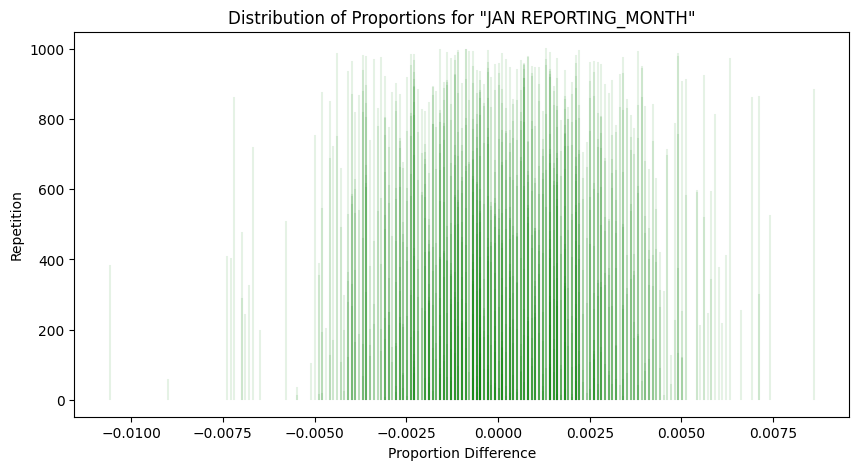

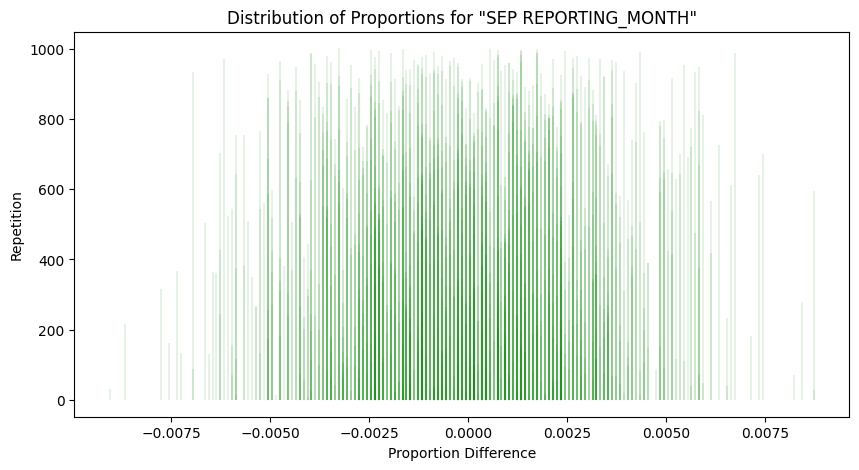

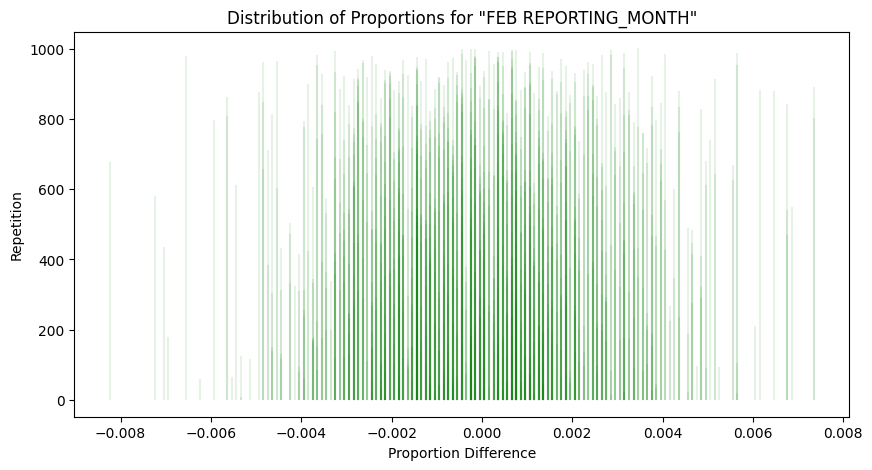

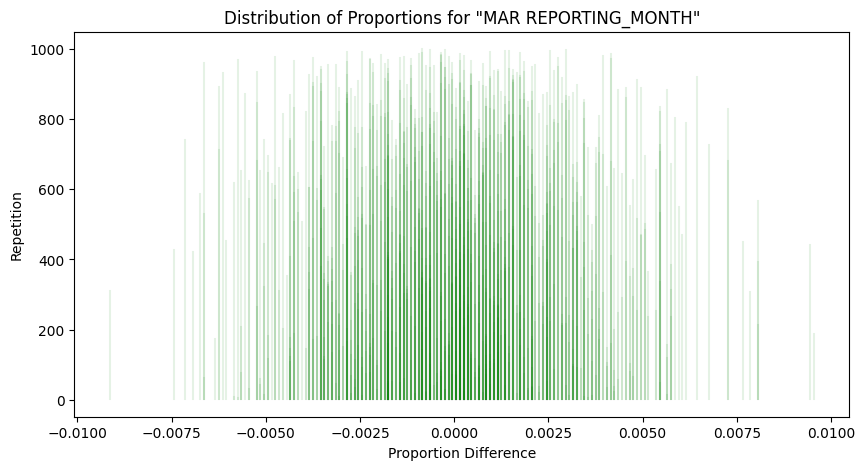

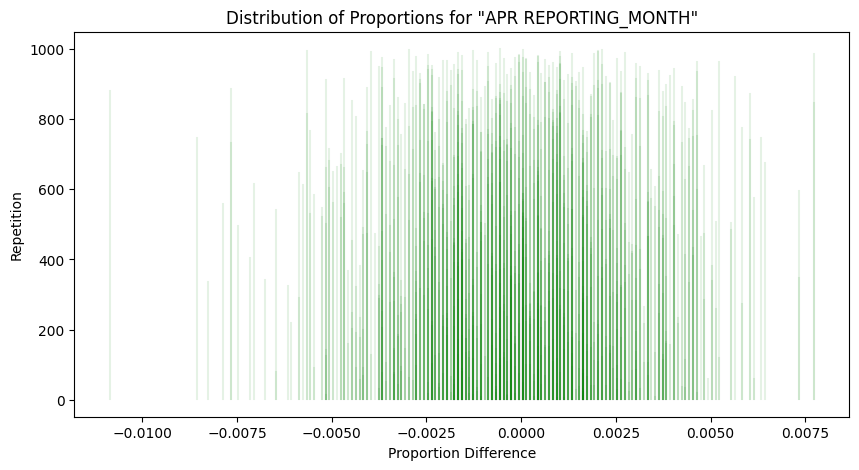

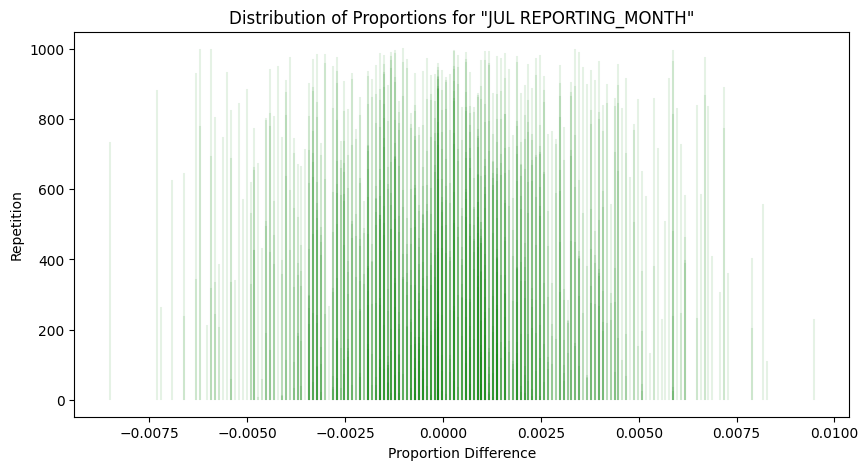

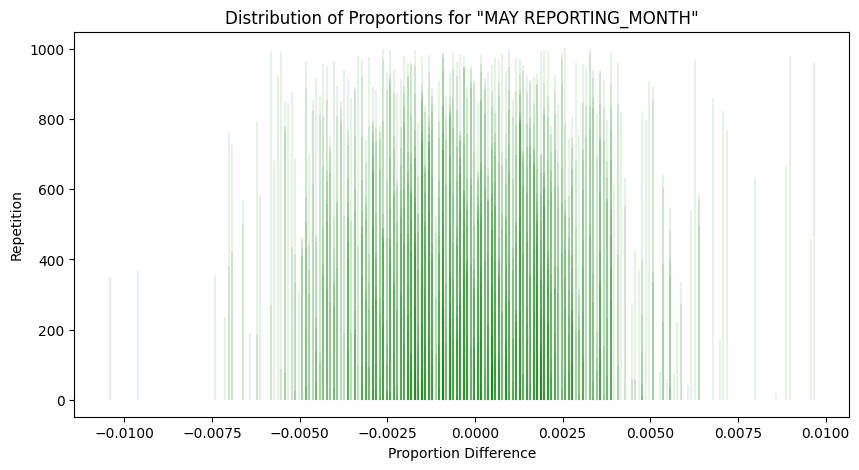

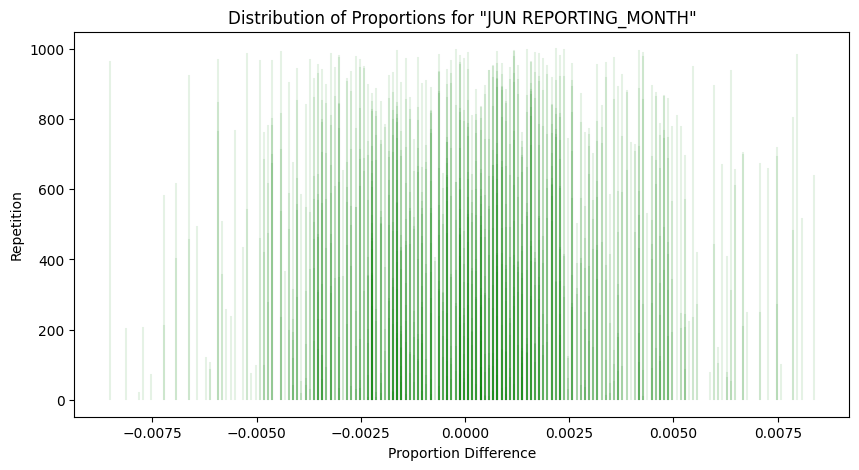

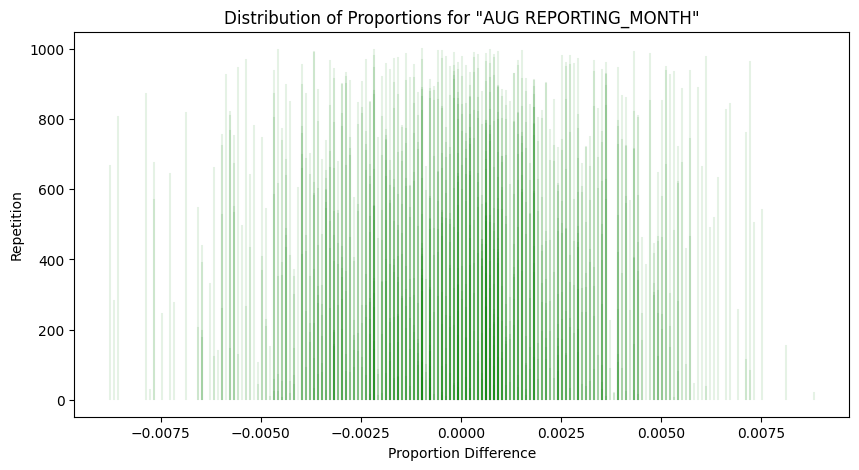

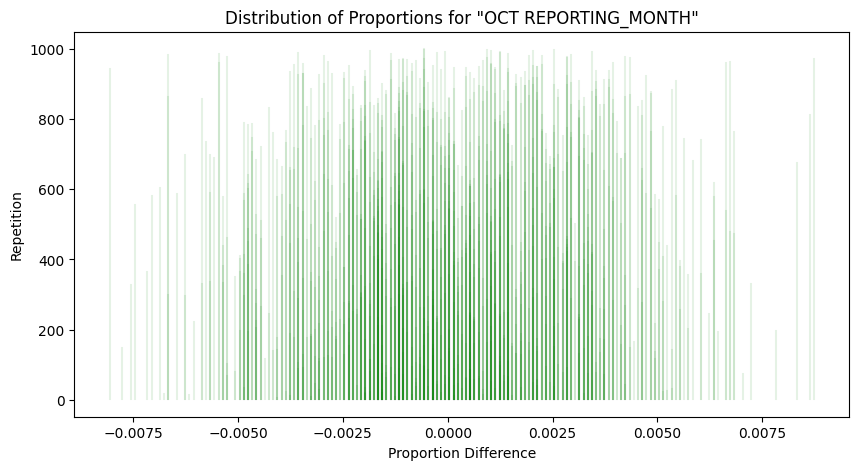

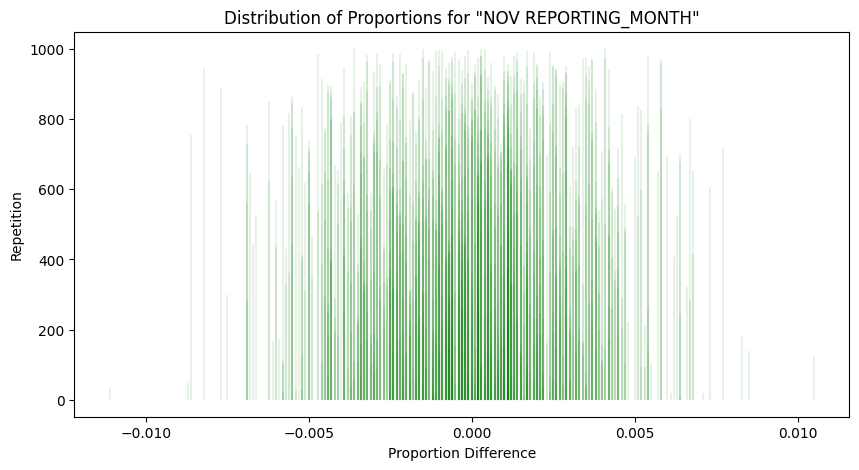

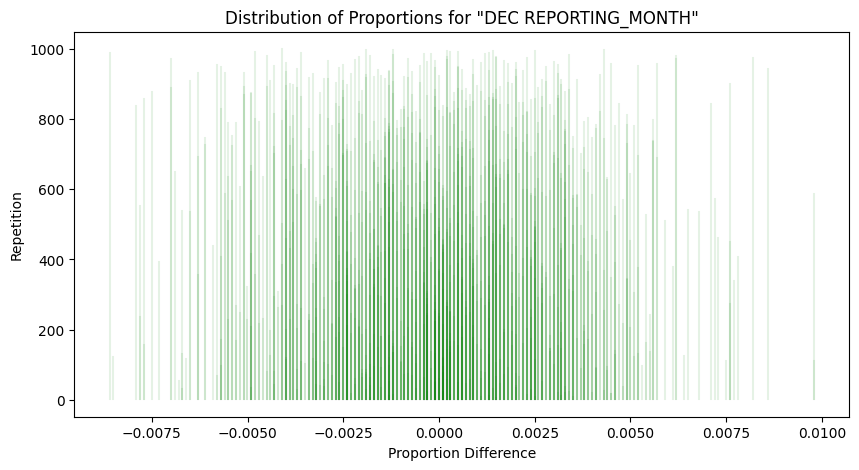

In [128]:
# Checking if Sample Proportion Graph for Shifts converge to Normal Distribution (CLT variation)

# Get unique values in the field
obs_col = "REPORTING_MONTH"
unique_obs_val = df[obs_col].unique()

# Number of repetitions
num_repetitions = 1000
# Number of values to sample for each repetition
num_values_to_sample = 10000

# Repeat sampling and proportion calculation
for obs_val in unique_obs_val:
    plt.figure(figsize=(10, 5))
    plt.title(f'Distribution of Proportions for "{obs_val.upper()} {obs_col}"')
    plt.ylabel('Repetition') 
    plt.xlabel('Proportion Difference')  
    obs_mean = (df[obs_col] == obs_val).mean()
    
    for _ in range(num_repetitions):
        # Randomly sample some values from the data
        sampled_data = df.sample(n=num_values_to_sample, replace=True)  # Sampling with replacement
        # Compute proportion for the current repetition
        proportion_diff = (sampled_data[obs_col] == obs_val).mean() - obs_mean
        # Plot proportion for the current repetition
        plt.plot([proportion_diff] * (_ + 1), range(1, _ + 2), color='green', alpha=0.1) 
    
    plt.savefig(f'{obs_col}_{obs_val.upper()}_distribution.png')
    plt.show()


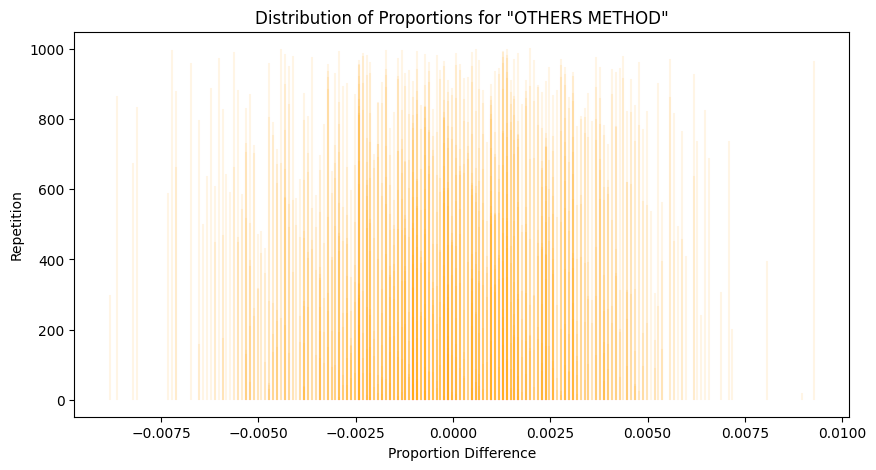

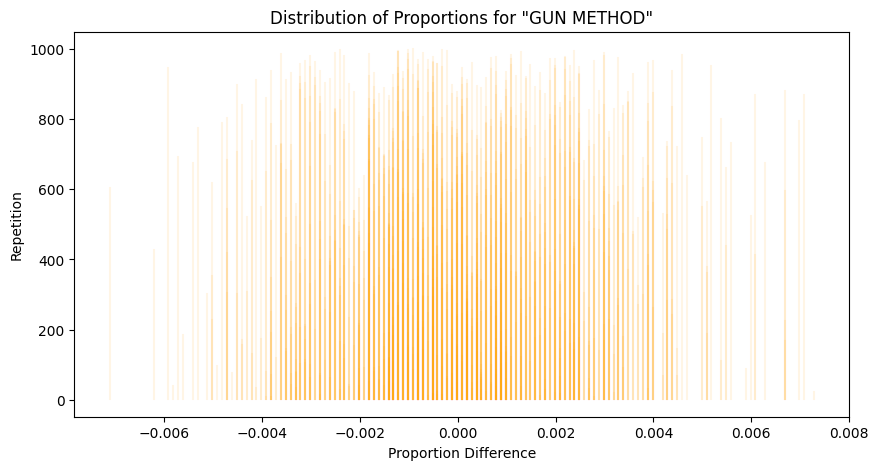

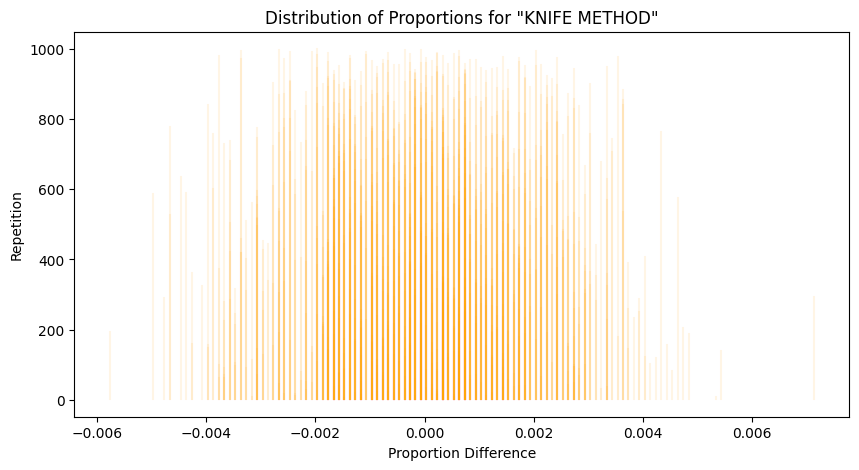

In [129]:
# Checking if Sample Proportion Graph for Shifts converge to Normal Distribution (CLT variation)

# Get unique values in the field
obs_col = "METHOD"
unique_obs_val = df[obs_col].unique()

# Number of repetitions
num_repetitions = 1000
# Number of values to sample for each repetition
num_values_to_sample = 10000

# Repeat sampling and proportion calculation
for obs_val in unique_obs_val:
    plt.figure(figsize=(10, 5))
    plt.title(f'Distribution of Proportions for "{obs_val} {obs_col}"')
    plt.ylabel('Repetition') 
    plt.xlabel('Proportion Difference')  
    obs_mean = (df[obs_col] == obs_val).mean()
    
    for _ in range(num_repetitions):
        # Randomly sample some values from the data
        sampled_data = df.sample(n=num_values_to_sample, replace=True)  # Sampling with replacement
        # Compute proportion for the current repetition
        proportion_diff = (sampled_data[obs_col] == obs_val).mean() - obs_mean
        # Plot proportion for the current repetition
        plt.plot([proportion_diff] * (_ + 1), range(1, _ + 2), color='orange', alpha=0.1) 
    
    plt.savefig(f'{obs_col}_{obs_val}_distribution.png')
    plt.show()


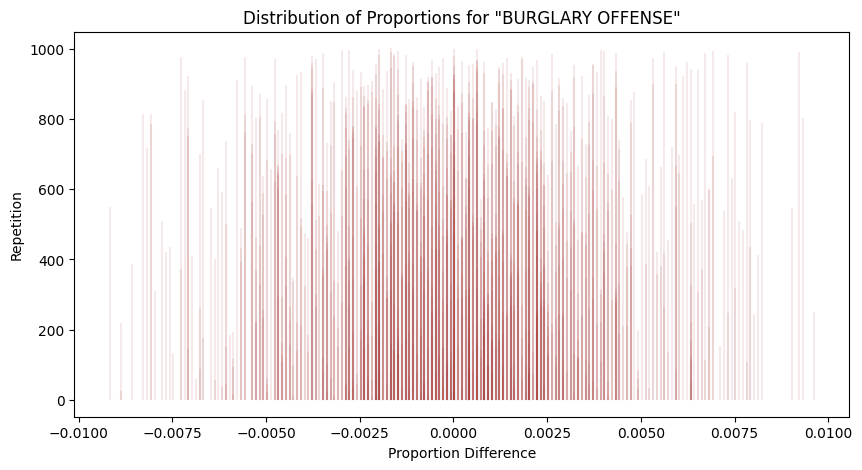

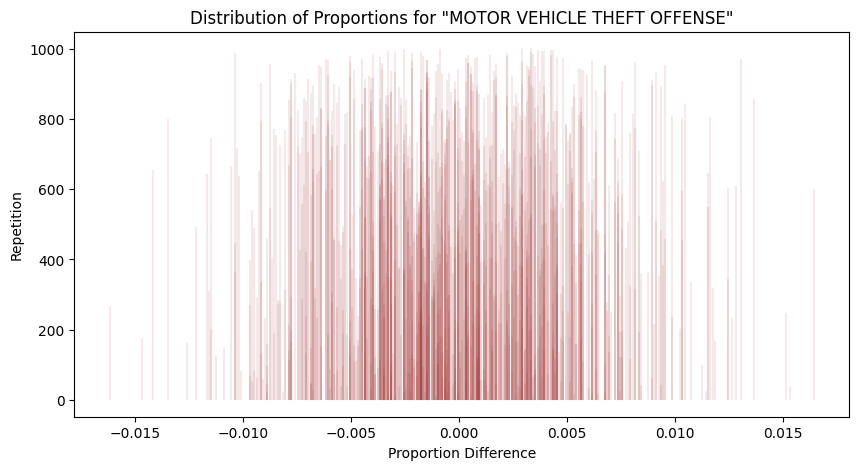

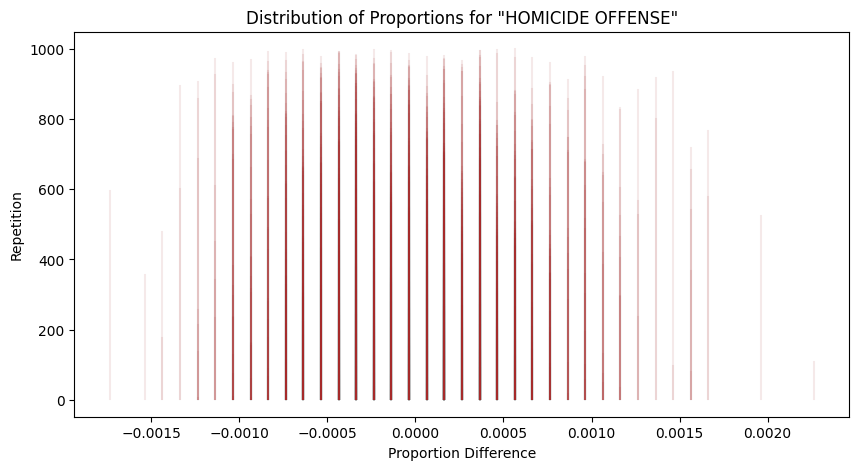

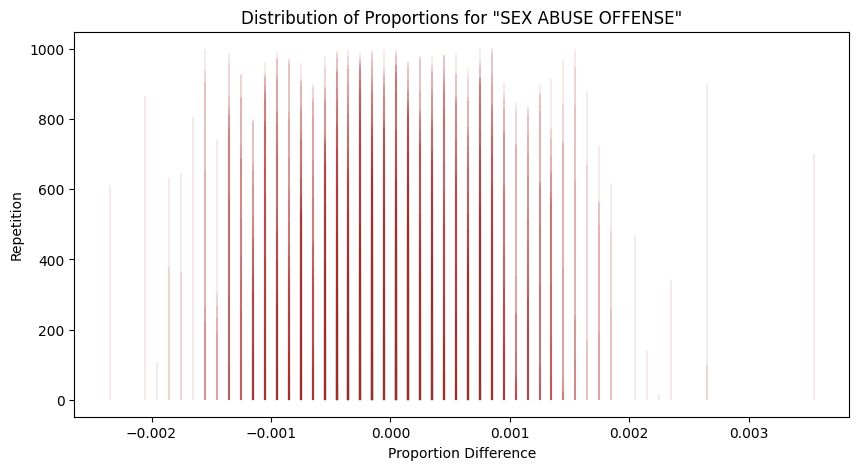

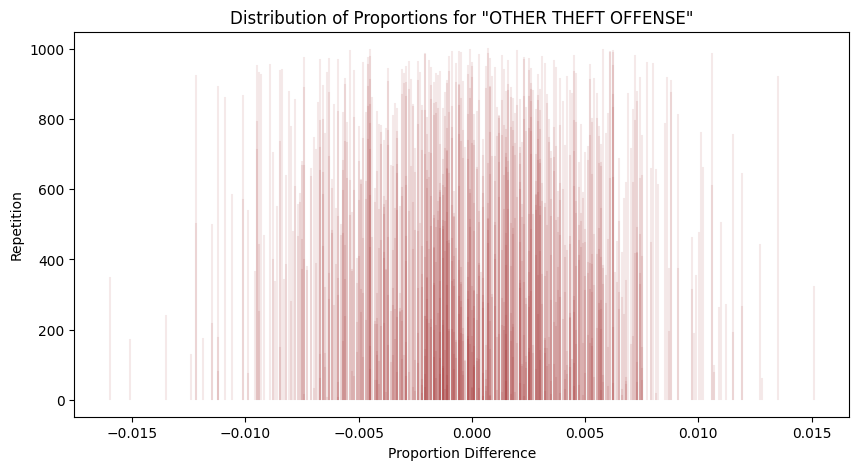

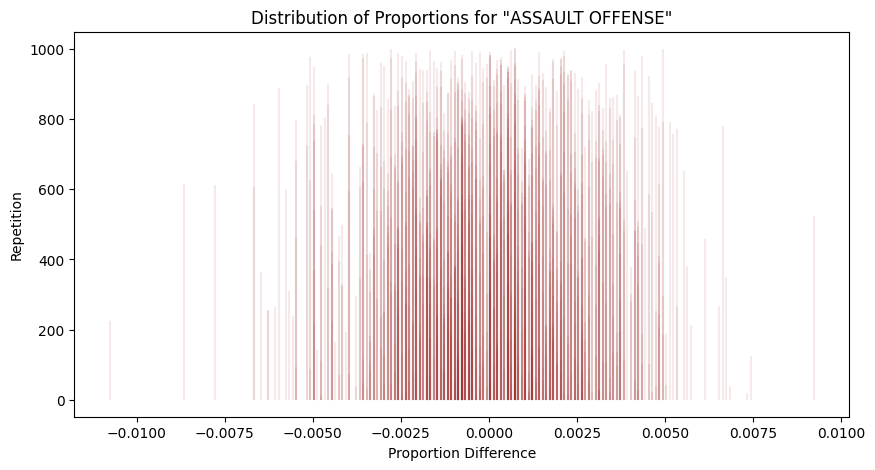

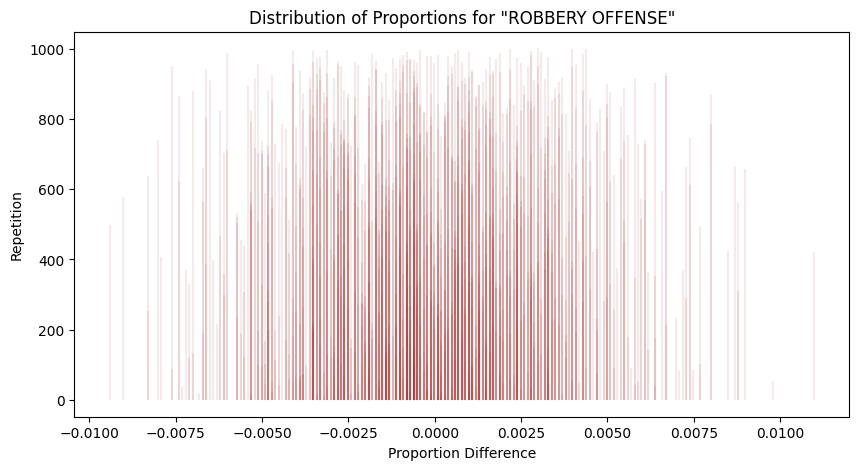

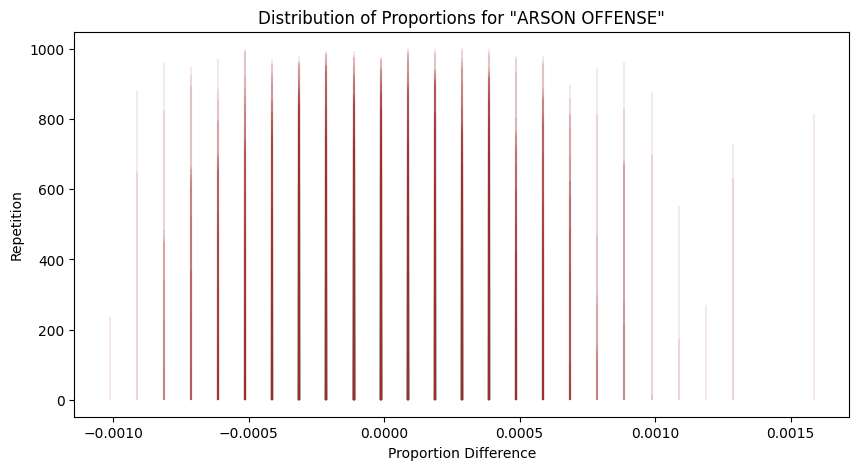

In [130]:
# Checking if Sample Proportion Graph for Shifts converge to Normal Distribution (CLT variation)

# Get unique values in the field
obs_col = "OFFENSE"
unique_obs_val = df[obs_col].unique()

# Number of repetitions
num_repetitions = 1000
# Number of values to sample for each repetition
num_values_to_sample = 10000

# Repeat sampling and proportion calculation
for obs_val in unique_obs_val:
    plt.figure(figsize=(10, 5))
    plt.title(f'Distribution of Proportions for "{obs_val} {obs_col}"')
    plt.ylabel('Repetition') 
    plt.xlabel('Proportion Difference')  
    obs_mean = (df[obs_col] == obs_val).mean()
    
    for _ in range(num_repetitions):
        # Randomly sample some values from the data
        sampled_data = df.sample(n=num_values_to_sample, replace=True)  # Sampling with replacement
        # Compute proportion for the current repetition
        proportion_diff = (sampled_data[obs_col] == obs_val).mean() - obs_mean
        # Plot proportion for the current repetition
        plt.plot([proportion_diff] * (_ + 1), range(1, _ + 2), color='brown', alpha=0.1) 
    
    plt.savefig(f'{obs_col}_{obs_val}_distribution.png')
    plt.show()


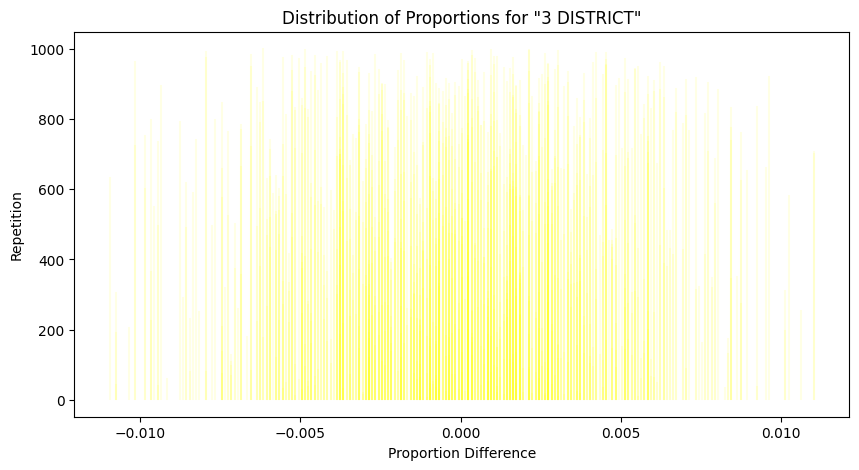

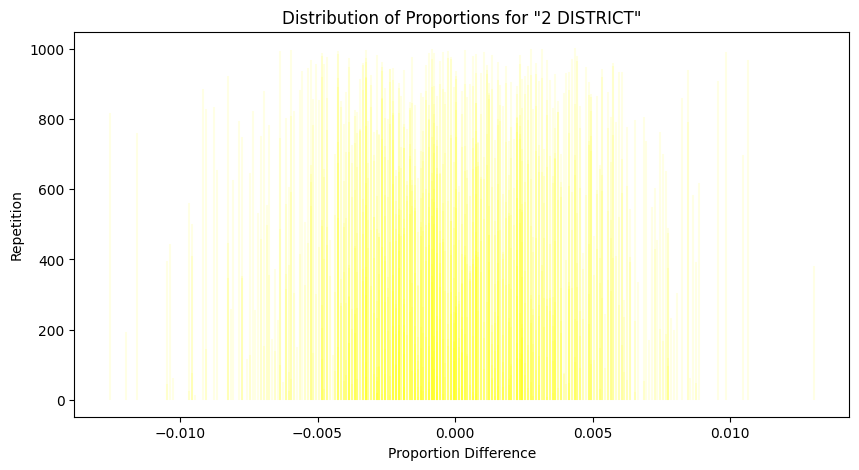

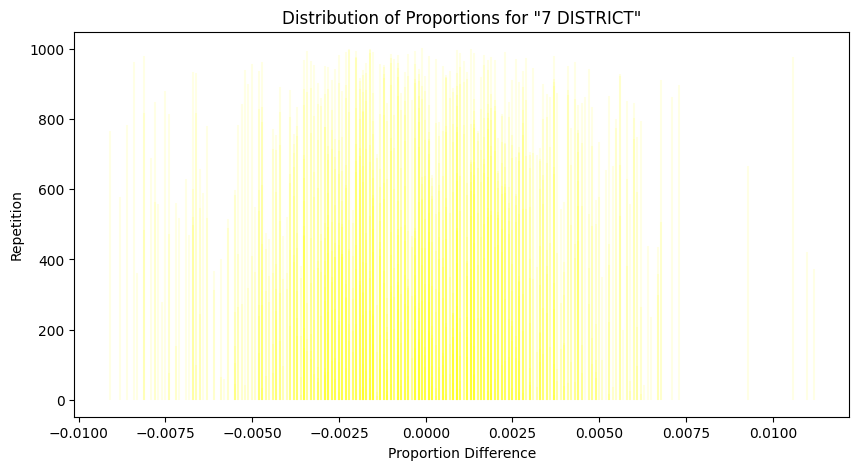

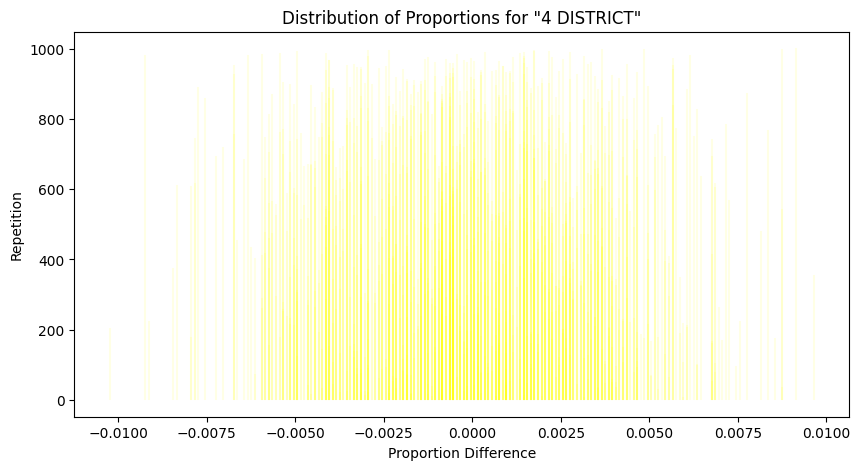

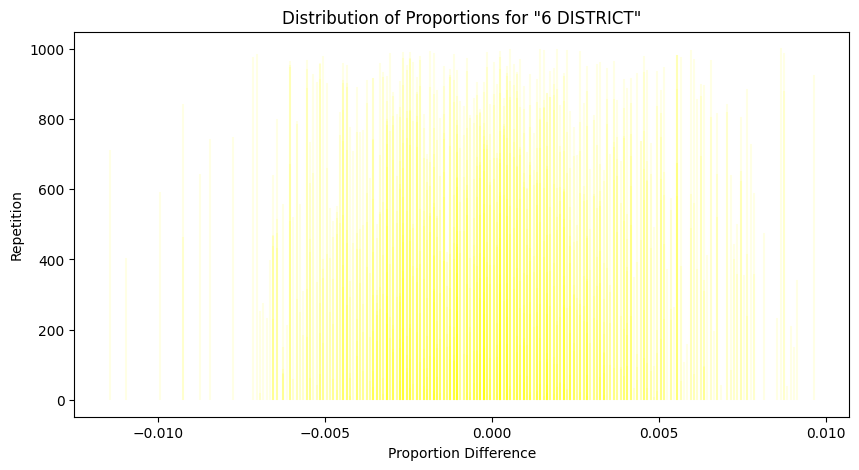

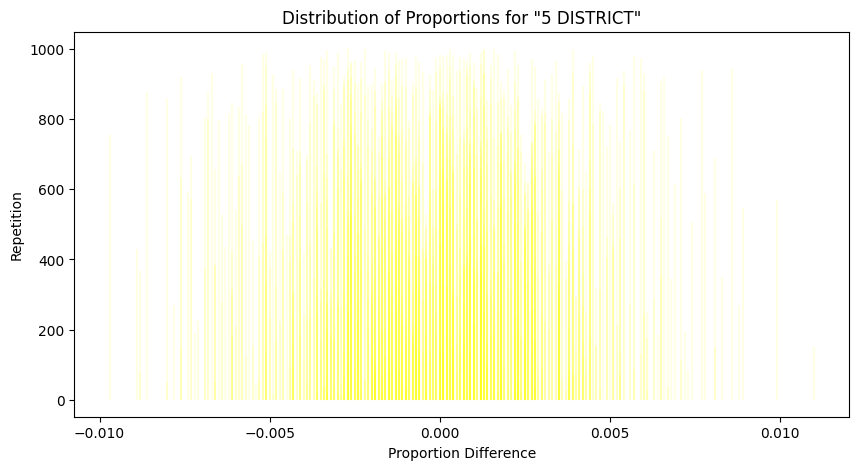

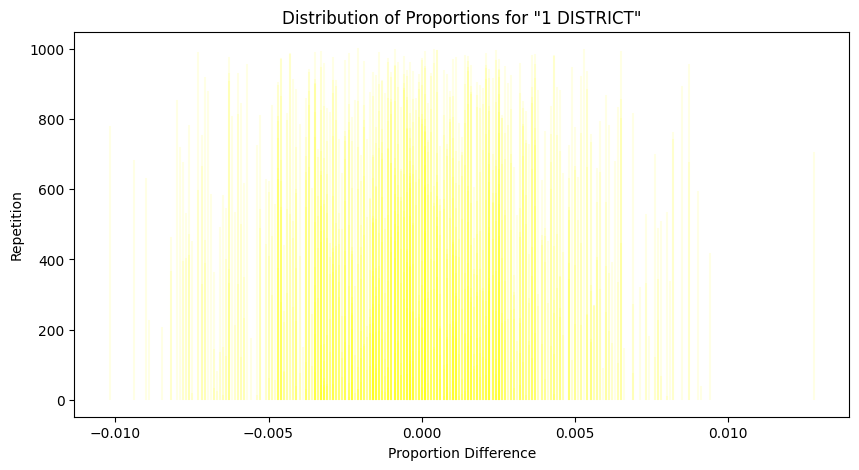

In [131]:
# Checking if Sample Proportion Graph for Shifts converge to Normal Distribution (CLT variation)

# Get unique values in the field
obs_col = "DISTRICT"
unique_obs_val = df[obs_col].unique()

# Number of repetitions
num_repetitions = 1000
# Number of values to sample for each repetition
num_values_to_sample = 10000

# Repeat sampling and proportion calculation
for obs_val in unique_obs_val:
    plt.figure(figsize=(10, 5))
    plt.title(f'Distribution of Proportions for "{obs_val} {obs_col}"')
    plt.ylabel('Repetition') 
    plt.xlabel('Proportion Difference')  
    obs_mean = (df[obs_col] == obs_val).mean()
    
    for _ in range(num_repetitions):
        # Randomly sample some values from the data
        sampled_data = df.sample(n=num_values_to_sample, replace=True)  # Sampling with replacement
        # Compute proportion for the current repetition
        proportion_diff = (sampled_data[obs_col] == obs_val).mean() - obs_mean
        # Plot proportion for the current repetition
        plt.plot([proportion_diff] * (_ + 1), range(1, _ + 2), color='yellow', alpha=0.1) 
    
    plt.savefig(f'{obs_col}_{obs_val}_distribution.png')
    plt.show()
